<a href="https://colab.research.google.com/github/edr0k/aglomeradosSMC_mestrado-gabriel/blob/main/paperplots_BAGPIPES_SMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start and Mounts

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/USP/Mestrado/MSc_project

#/content/drive/MyDrive/Mestrado/MSc_project/StellarClusterFittingSPLUS/results/cats/


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/USP/Mestrado/MSc_project


# Imports and Tables new

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.stats import biweight_scale, biweight_location
from astropy.table import Table, hstack, join, unique, vstack
import matplotlib as mpl
import matplotlib.patches as patches
import StellarClusterFittingSPLUS.utils
from scipy import stats
import seaborn as sns
from seaborn import histplot
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.linear_model import BayesianRidge, LinearRegression



mpl.rcParams['axes.linewidth'] = 1.5

mpl.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})


dic_age_ref = {'CVH+06': 0, 'DKB+16': 1, 'GGG+08': 2, 'GGK10': 3, 'GGS+08': 4, 'PGC+14': 5, 'RGB+07': 6, 'UPB+17': 7}
dic_Z_ref = {'DH98': 0, 'DKB+16': 1, 'MSF98': 2, 'PGC+14': 3, 'PGC+15': 4, 'PGC+16': 5, 'PGG+09': 6, 'PPV17': 7,
             'PSC+01': 8, 'SSN+07': 9, 'UPB+17': 10}
dic_ebv_ref = {'UPB+17': 0, 'GZB+20': 1}

x = 'logAge'
y = 'FeH'
xbagpipes = 'burst:age'
ybagpipes = 'burst:metallicity'

pt98_analytical_models_SMC = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/model/pt98_analytical_models_SMC.csv', format='csv')
closedbox06_SMC = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/model/closed box model_ -0.6 dex.csv', format='csv')
closedbox05_SMC = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/model/closed box model_ -0.5 dex.csv', format='csv')
hz04_SMC = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/model/HZ04 model.csv', format='csv')
C13_B_SMC = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/model/C13-B.csv', format='csv')
C13_C_SMC = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/model/C13-C.csv', format='csv')
TB09_1_SMC = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/model/TB09-1.csv', format='csv')
TB09_2_SMC = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/model/TB09-2.csv', format='csv')
TB09_3_SMC = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/model/TB09-3.csv', format='csv')
APOGEE_SMC = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/literature/APOGEEDR16_SmallMC.csv', format='csv')

model = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/model/bagpipes_burst_grid.csv', format='csv')
model_SSP = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/model/mag_new.dat', format='ascii')
model_SSP = model_SSP[model_SSP['Z']<0.019]
#print(model_SSP.colnames)

photometry_table = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/data/phot_100_all_derred.csv', format='csv')
photometry_table = photometry_table[photometry_table['flag_r']!=3]
photometry_table = photometry_table[photometry_table['flag_u']!=3]
photometry_table = unique(photometry_table, 'object', keep='first')

literature = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/literature/parameter-cat_Conly_ref.csv', format='csv')

results_cat_bagpipes = Table.read('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/FINAL_RUN/pipes/cats/phot_100_all_derred_burst_z.csv', format='csv')
results_cat_bagpipes = results_cat_bagpipes[results_cat_bagpipes['flag_r']!=3]
results_cat_bagpipes = results_cat_bagpipes[results_cat_bagpipes['flag_u']!=3]
results_cat_bagpipes = unique(results_cat_bagpipes, 'object', keep='first')

results_cat = Table.read('FINAL_RUN/results/cats/phot_100_all_derred_chi2.csv', format='csv')
#results_cat = Table.read('FINAL_RUN/results/cats/phot_100_all_derred_zband_Znorm.csv', format='csv')
results_cat = results_cat[results_cat['flag_r']!=3]
results_cat = results_cat[results_cat['flag_u']!=3]
results_cat = unique(results_cat, 'object', keep='first')

results_cat_bagpipes=join(results_cat_bagpipes, photometry_table, keys=['object','flag_u','flag_r'])
results_cat=join(results_cat, photometry_table, keys=['object','flag_u','flag_r'])

################################################################################
# Z_ref_dict = {'DH98':0, 'DKB+16':1, 'MSF98':2, 'PGC+15':3, 'PGC+16':4, 'PGG+09':5, 'PPV17':6, 'PSC+01':7, 'SSN+07':8}
# Z_sol_values = [0.02, 0.0152, 0.02, 0.019, 0.019, 0.019, 0.0152, 0.0152, 0.02]
# print('object Z_sol Z Z_sol_ref FeH')
# for i in range(len(results_cat)):
#     try:
#         Z_sol = Z_sol_values[Z_ref_dict[results_cat['r__M_H_'][i]]]
#     except:
#         Z_sol = 0.0152
#         results_cat['FeH'][i] = 0.
#         results_cat['Z'][i]= 0.
#         results_cat_bagpipes['FeH'][i] = 0.
#         results_cat_bagpipes['Z'][i]= 0.
        
#     Z = 0.0152 * 10**(literature['FeH'][i])
#     if(results_cat['FeH'][i] != 0. and Z_sol!=0.0152):
#         results_cat['FeH'][i] = round(np.log10(Z/Z_sol),2)
#         results_cat_bagpipes['FeH'][i] = round(np.log10(Z/Z_sol),2)
  
print(float(results_cat[results_cat['object']=='NGC152']['FeH']), float(results_cat_bagpipes[results_cat_bagpipes['object']=='NGC152']['FeH']))
print(float(results_cat[results_cat['object']=='OGLE-CL SMC  311']['FeH']), float(results_cat_bagpipes[results_cat_bagpipes['object']=='OGLE-CL SMC  311']['FeH']))
print(float(results_cat[results_cat['object']=='NGC411']['FeH']), float(results_cat_bagpipes[results_cat_bagpipes['object']=='NGC411']['FeH']))
#########################################################################################################################
g_SSP = model_SSP['gSDSS']
i_SSP = model_SSP['iSDSS']
r_SSP = model_SSP['rSDSS']
z_SSP = model_SSP['zSDSS']

g = model['gSDSS']
i = model['iSDSS']
r = model['rSDSS']
z = model['zSDSS']
#########################################################################################################################

t = results_cat
t_knownfeh = t[t['FeH'] != 0.]
t_flagr0 = t[t['flag_r'] == 0]
t_flagu0 = t[t['flag_u'] == 0]
t_flag0 = t_flagr0[t_flagr0['flag_u'] == 0]

t_flag0knownfeh = t_flag0[t_flag0['FeH'] != 0.]
t_flag0knownage = t_flag0[t_flag0['logAge'] != 0.]

t_flag0logage9 = t_flag0knownage[t_flag0knownage['logAge'] > 9.]
t_flag0logage8to9 = t_flag0knownage[(t_flag0knownage['logAge'] <= 9.) & (t_flag0knownage['logAge'] > 8.)]
t_flag0lesslogage8 = t_flag0knownage[t_flag0knownage['logAge'] <= 8.]

t_flag0knownfehlogage9 = t_flag0logage9[t_flag0logage9['FeH'] != 0.]
t_flag0knownfehlogage8to9 = t_flag0logage8to9[t_flag0logage8to9['FeH'] != 0.]
t_flag0knownfehlesslogage8 = t_flag0lesslogage8[t_flag0lesslogage8['FeH'] != 0.]

t_flag0logage9_calc = t_flag0[t_flag0['50_logAge'] > 9.]
t_flag0logage8to9_calc = t_flag0[(t_flag0['50_logAge'] <= 9.) & (t_flag0['50_logAge'] > 8.)]
t_flag0lesslogage8_calc = t_flag0[t_flag0['50_logAge'] <= 8.]


#########################################################################################################

tbagpipes = results_cat_bagpipes

#print(np.log10(tbagpipes[tbagpipes['object']=='NGC294']['burst:age_50']*10**9), np.log10(tbagpipes[tbagpipes['object']=='NGC294']['burst:metallicity_50']*0.02/0.0152), 
#      t[t['object']=='NGC294']['50_logAge'], t[t['object']=='NGC294']['50_FeH'])

tbagpipes_knownfeh = tbagpipes[tbagpipes['FeH'] != 0.]
tbagpipes_knownfeh_flagnot0 = tbagpipes_knownfeh[(tbagpipes_knownfeh['flag_r'] != 0.) | (tbagpipes_knownfeh['flag_u'] != 0.)]

tbagpipes_knownage = tbagpipes[tbagpipes['logAge'] != 0.]
tbagpipes_knownage_flagnot0 = tbagpipes_knownage[(tbagpipes_knownage['flag_r'] != 0.) | (tbagpipes_knownage['flag_u'] != 0.)]

tbagpipes_flagr0 = tbagpipes[tbagpipes['flag_r'] == 0]
tbagpipes_flagu0 = tbagpipes[tbagpipes['flag_u'] == 0]
tbagpipes_flag0 = tbagpipes_flagr0[tbagpipes_flagr0['flag_u'] == 0]
tbagpipes_flag0knownfeh = tbagpipes_flag0[tbagpipes_flag0['FeH'] != 0.]
tbagpipes_flag0knownage = tbagpipes_flag0[tbagpipes_flag0['logAge'] != 0.]

tbagpipes_flag0logage9 = tbagpipes_flag0knownage[tbagpipes_flag0knownage['logAge'] > 9.]
tbagpipes_flag0logage8to9 = tbagpipes_flag0knownage[(tbagpipes_flag0knownage['logAge'] <= 9.) & (tbagpipes_flag0knownage['logAge'] > 8.)]
tbagpipes_flag0lesslogage8 = tbagpipes_flag0knownage[tbagpipes_flag0knownage['logAge'] <= 8.]

tbagpipes_flag0knownfehlogage9 = tbagpipes_flag0logage9[tbagpipes_flag0logage9['FeH'] != 0.]
tbagpipes_flag0knownfehlogage8to9 = tbagpipes_flag0logage8to9[tbagpipes_flag0logage8to9['FeH'] != 0.]
tbagpipes_flag0knownfehlesslogage8 = tbagpipes_flag0lesslogage8[tbagpipes_flag0lesslogage8['FeH'] != 0.]

tbagpipes_flag0logage9_calc = tbagpipes_flag0[np.log10(tbagpipes_flag0['burst:age_50']* 10**9) > 9.]
tbagpipes_flag0logage8to9_calc = tbagpipes_flag0[(np.log10(tbagpipes_flag0['burst:age_50']* 10**9) <= 9.) & (np.log10(tbagpipes_flag0['burst:age_50']* 10**9) > 8.)]
tbagpipes_flag0lesslogage8_calc = tbagpipes_flag0[np.log10(tbagpipes_flag0['burst:age_50']* 10**9) <= 8.]

tbagpipes_flag0.write('results_bagpipes.csv', overwrite=True, format='csv')
t_flag0.write('results_ssp.csv', overwrite=True, format='csv')


-0.8 -0.8
-1.19 -1.19
-0.84 -0.84


# Figure 1: Transmission curves of S-PLUS filters, based on laboratory measurements.

In [ ]:
import glob
from scipy import interpolate
from matplotlib.patches import Rectangle
try:
  import splusdata
except:
  %pip install splusdata
  import splusdata

colors = ("#9900FF", "#0000FF", "#006600", "#CC0066", "#009999", "#FF0000", 
          "#990033", "#DD8000", "#660033", "#330033", "#CC00FF", "#6600FF")

colors = ["#CD00CD", "#610061", "#8000A1", "#7E00DB", "#3D00FF", "#00C0FF",
          "#1FFF00", "#FF6300", "#FF0000", "#D20000", "#610000", "#AA0000"]
colors = np.asarray(colors)

filenames =  ['splus_filtercurves/uJAVA.dat', 'splus_filtercurves/F0378.dat',
             'splus_filtercurves/F0395.dat', 'splus_filtercurves/F0410.dat',
             'splus_filtercurves/F0430.dat', 'splus_filtercurves/gSDSS.dat', 
             'splus_filtercurves/F0515.dat', 'splus_filtercurves/rSDSS.dat',                   
             'splus_filtercurves/F0660.dat', 'splus_filtercurves/iSDSS.dat',             
             'splus_filtercurves/F0861.dat', 'splus_filtercurves/zSDSS.dat']


i = 0

fig = plt.figure(figsize=(15,10), dpi=100)
gs = fig.add_gridspec(nrows=5, ncols=8)
gs.update(wspace=None, hspace=None)

ax = fig.add_subplot(gs[1:, 0:7])
for filename in filenames:
    print(filename)
    filters = ['u', 'J0378', 'J0395','J0410', 'J0430', 'g', 'J0515', 'r',    
                'J0660', 'i', 'J0861', 'z']


    #filters = ['F378', 'F410', 'G', 'F660', 'F430', 'R', 'I', 'F515', 'F861', 'Z', 
    #           'U', 'F395']

    filter_x = np.loadtxt(filename, delimiter=' ')
    mask = filter_x[:, 1] > 0.0008
    filter_x = filter_x[mask]
    intensity = filter_x[:, 1]
    interp_filter = interpolate.interp1d(filter_x[:, 0], intensity, axis=0)
    min_wav = filter_x[:, 0].min()
    max_wav = filter_x[:, 0].max()
    wavelengths = np.linspace(min_wav, max_wav, 10000)
    intens = []

    for wavelength in wavelengths:
        a = interp_filter(wavelength)
        intens.append(a)
    intens = np.asarray(intens)
    final = np.c_[wavelengths, intens]

    value_max_int = intensity.max()
    data = pd.DataFrame(final, columns=["wavelength", "intensity"])

    index_max_int = abs(data['intensity'] - value_max_int).idxmin()

    left_wave = data[:index_max_int]
    right_wave = data[index_max_int:]

    value = value_max_int / 2.

    index_left = abs(left_wave['intensity'] - value).idxmin()
    index_right = abs(right_wave['intensity'] - value).idxmin()


    central_wave = (data["wavelength"][index_left] + data["wavelength"][index_right]) / 2.
    closes_central_wave = abs(data['wavelength'] - central_wave).idxmin()
    
    if filters[i] == 'J0378' or filters[i] == 'J0410' or filters[i] == 'J0660' or filters[i] == 'J0430' or filters[
        i] == 'J0861' or filters[i] == 'J0515' or filters[i] == 'J0395':
        ax.plot(final[:, 0], final[:, 1], c=colors[i], linestyle='--', linewidth=2, zorder=-1, label=filters[i])
    else:
        ax.plot(final[:, 0], final[:, 1], c=colors[i], linestyle='-', linewidth=2, zorder=-3, label=filters[i])

    plt.tick_params(which='major', direction='in', width=1, length=7)
    plt.tick_params(top="on", direction='in', width=1)
    plt.tick_params(bottom="on", direction='in', width=1)
    plt.tick_params(right="on", direction='in', width=1)
    plt.tick_params(left="on", direction='in', width=1)
    plt.tick_params(top="on", which='minor', direction='in', width=1, length=3)
    plt.tick_params(right="on", which='minor', direction='in', width=1, length=3)
    plt.minorticks_on()

    if filters[i] == 'g' or filters[i] == 'r' or filters[i] == 'i' or filters[i] == 'z' or filters[
        i] == 'z':
        plt.fill_between(final[:, 0], final[:, 1], color=colors[i], alpha=0.4, zorder=-3)
    else:
        plt.fill_between(final[:, 0], final[:, 1], color=colors[i], alpha=0.6)

    i = i + 1

plt.legend(loc='upper right', scatterpoints=1, markerscale=4, shadow=True, 
           bbox_to_anchor=[1.0, 1.00], fancybox=True, fontsize=20, 
           handlelength=2, frameon=False,)
ax.set_ylim(0.01, 1)
ax.set_xlim(3000, 10530)



plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel(r'Wavelength ($\AA$)', fontsize=15)
plt.ylabel('Transmission ($\%$)', fontsize=15)


from astropy.visualization import simple_norm

conn = splusdata.connect('edr0k', '1a7zqw43')

#filters = ['F378', 'F410', 'G', 'F660', 'F430', 'R', 'I', 'F515', 'F861', 'Z', 
#           'U', 'F395']
filters = ['U', 'F378',  'F395', 'F410', 'F430', 'G', 'F515', 'R', 'F660','I',
           'F861', 'Z']

filters_n = ['u', 'J0378', 'J0395','J0410', 'J0430', 'g', 'J0515', 'r',    
                'J0660', 'i', 'J0861', 'z']

i = 0
j = 1
k = 0 
for f in filters:
  #IMAGEM DO NGC 121 para o plot
  # lindsay 56 ra=14.375833,	dec=-72.26417
  # ngc 121 ra=6.702083, dec=-71.53472
  hdu = conn.get_cut(ra=6.702083, dec=-71.53472, 	radius=250, band=f)
  data_img = hdu[1].data
  
  if i<8:
    ax = fig.add_subplot(gs[0, i])
    i = i + 1
  else: 
    ax = fig.add_subplot(gs[j, 7])
    j = j + 1  
  ax.axes.get_yaxis().set_visible(False)
  ax.axes.get_xaxis().set_visible(False)
  

  norm = simple_norm(data_img, 'sqrt', percent=99)
  ax.imshow(data_img, norm=norm, interpolation='nearest', cmap='binary')
  ax.text(0.95,0.95, filters_n[k], transform=ax.transAxes, va='top', ha='right', fontsize=20)
  

  # tenta colocar alguma coisa assim:
  rect = Rectangle((0,0), 2, 2, facecolor=colors[k], 
                   alpha=0.2, transform=ax.transAxes, zorder=10)
  ax.add_patch(rect)

  k = k + 1

  
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/Artigos/BAGPIPES_SMC/transmissioncurves_gabrielb.pdf', dpi=100, bbox_inches='tight')


  Using cached splusdata-3.84-py3-none-any.whl (30 kB)
  Using cached astroquery-0.4.6-py3-none-any.whl (4.5 MB)
  Using cached pyvo-1.2.1-py3-none-any.whl (832 kB)
  Using cached keyring-23.5.0-py3-none-any.whl (33 kB)
  Using cached jeepney-0.8.0-py3-none-any.whl (48 kB)
  Using cached SecretStorage-3.3.2-py3-none-any.whl (15 kB)
  Using cached cryptography-36.0.2-cp36-abi3-manylinux_2_24_x86_64.whl (3.6 MB)
ERROR: Operation cancelled by user


ModuleNotFoundError: ignored

#Reddening Map

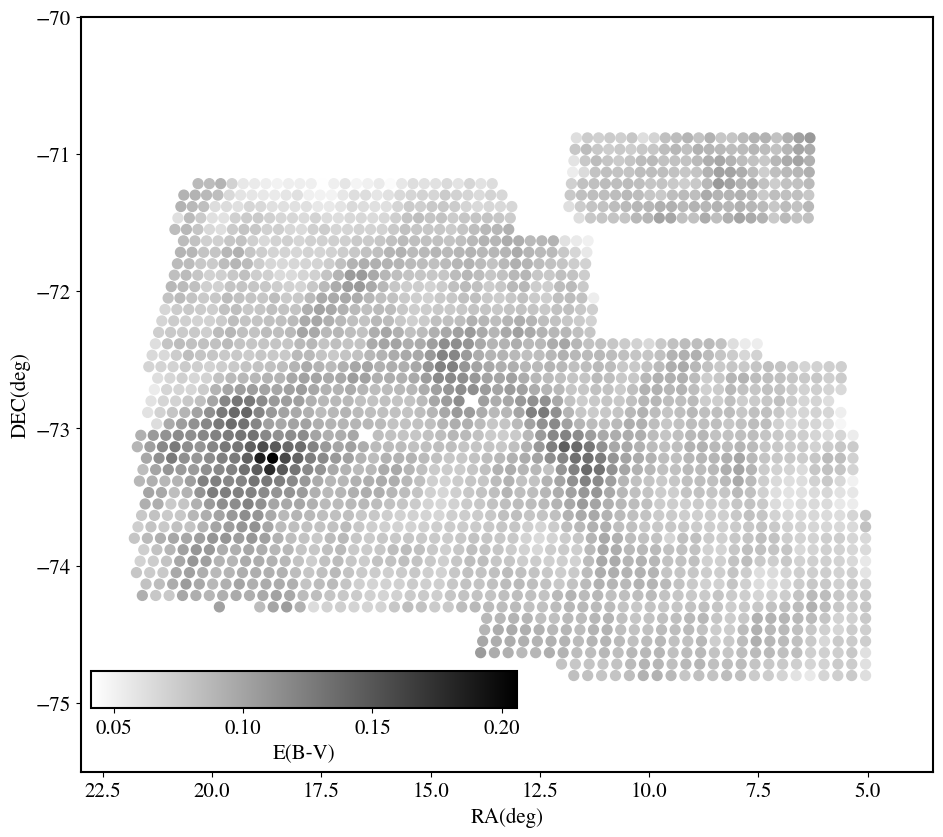

In [ ]:
reddening_map = np.loadtxt('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/StellarClusterFittingSPLUS/literature/smc_res5_radius7.txt')

fig = plt.figure(figsize=(11,10), dpi=100)
fig = plt.subplot(1,1,1)
plt.xlabel('RA(deg)')
plt.ylabel('DEC(deg)')
plt.ylim(-75.5, -70)
plt.xlim(23, 3.5)

c = reddening_map[:, 2]
r = plt.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', 
            marker='o', zorder=-1, s=50)
axins = inset_axes(fig,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.07, 1, 1),
                   bbox_transform=fig.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')




plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/reddening_map.pdf', dpi=100)

# r-z x g-i diagram for BAGPIPES models

/usr/local/lib/python3.7/dist-packages/astropy/table/column.py:1157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)
/usr/local/lib/python3.7/dist-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/usr/local/lib/python3.7/dist-packages/astropy/table/column.py:1157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)
/usr/local/lib/python3.7/dist-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/usr/local/lib/python3.7/dist-pack

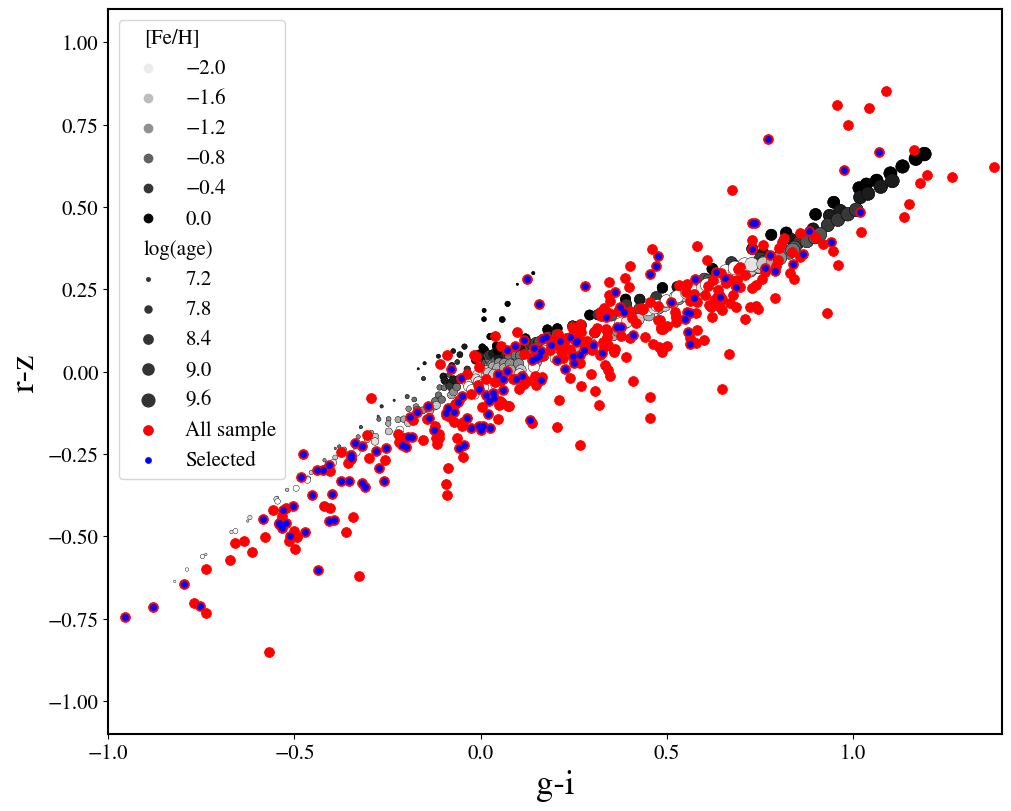

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(10, 8), dpi=100)
gs = fig.add_gridspec(nrows=1, ncols=1)
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_xlim(-1.,1.4)
ax1.set_ylim(-1.1,1.1)
ax1.set_xlabel('g-i', fontsize=25)
ax1.set_ylabel('r-z', fontsize=25)

model.rename_column('age', 'log(age)') 
model.rename_column('metallicity', '[Fe/H]') 


sns.scatterplot(data=model, x=g-i, y=r-z, size=np.log10(model['log(age)']*10**9),
                marker='o', hue=np.log10(model['[Fe/H]']*0.02/0.0152), legend='brief', 
                alpha=1, sizes=(0, 100), palette='binary', ax=ax1, edgecolor='black', zorder=0)

model.rename_column('log(age)', 'age') 
model.rename_column('[Fe/H]', 'metallicity') 

sns.scatterplot(data=t, x=tbagpipes['gSDSS'] - tbagpipes['iSDSS'], 
                y=tbagpipes['rSDSS']-tbagpipes['zSDSS'], marker="o", 
                ec="face", alpha=1, s=50,
                color='red', sizes=(200), ax=ax1, zorder=2, label='All sample')
sns.scatterplot(data=tbagpipes_flag0, x=tbagpipes_flag0['gSDSS'] - tbagpipes_flag0['iSDSS'], 
                y=tbagpipes_flag0['rSDSS']-tbagpipes_flag0['zSDSS'], marker="o",
                ec="face", alpha=1, s=20,
                color='blue', sizes=(200), ax=ax1, zorder=2, label=r'Selected')


plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/model_bagpipes_CC.pdf', dpi=100)


# r-z x g-i diagram with χ² square for BAGPIPES models

/usr/local/lib/python3.7/dist-packages/astropy/table/column.py:1157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)
/usr/local/lib/python3.7/dist-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/usr/local/lib/python3.7/dist-packages/astropy/table/column.py:1157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)
/usr/local/lib/python3.7/dist-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


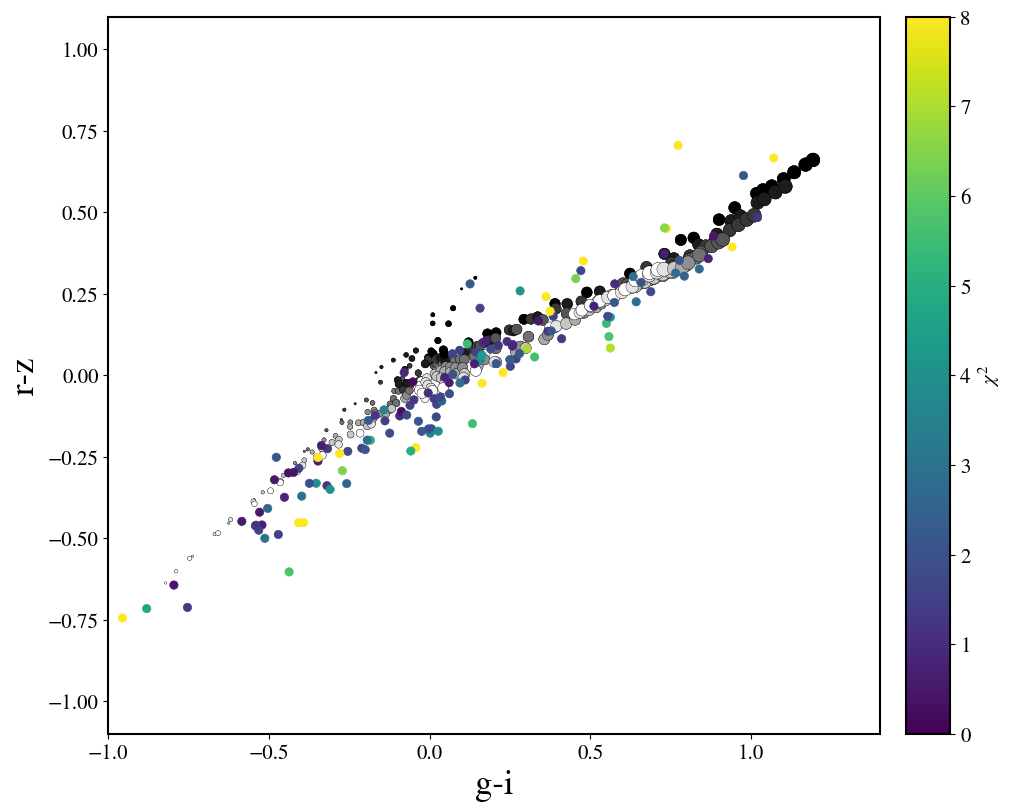

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(10, 8), dpi=100)
gs = fig.add_gridspec(nrows=1, ncols=1)
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_xlim(-1.,1.4)
ax1.set_ylim(-1.1,1.1)
ax1.set_xlabel('g-i', fontsize=25)
ax1.set_ylabel('r-z', fontsize=25)
  
#bands_age1 = (['uJava', 'uJava', 'uJava', 'uJava', 'F378', 'F378', 'F430', 'gSDSS', 'gSDSS', 'uJava', 'uJava'])
#bands_age2 = (['F660', 'rSDSS', 'iSDSS', 'zSDSS', 'F515', 'gSDSS', 'gSDSS', 'zSDSS', 'F660', 'F861', 'F515'])
#bands_Z1 = (['iSDSS', 'rSDSS', 'uJava', 'F378', 'F410', 'F430', 'F515', 'F660', 'F660', 'gSDSS', 'iSDSS'])
#bands_Z2 = (['zSDSS', 'zSDSS', 'zSDSS', 'zSDSS', 'zSDSS', 'iSDSS', 'zSDSS', 'F861', 'iSDSS', 'zSDSS', 'F861'])

# ###############################################################################
model.rename_column('age', 'log(age)') 
model.rename_column('metallicity', '[Fe/H]') 


sns.scatterplot(data=model, x=g-i, y=r-z, size=np.log10(model['log(age)']*10**9),
                marker='o', hue=np.log10(model['[Fe/H]']*0.02/0.0152), legend='brief', 
                alpha=1, sizes=(0, 100), palette='binary', ax=ax1, edgecolor='black', zorder=0)

model.rename_column('log(age)', 'age') 
model.rename_column('[Fe/H]', 'metallicity') 

#is_outlier = (tbagpipes_flag0['chisq_phot'] >= 5)
sns.scatterplot(data=tbagpipes_flag0, x=tbagpipes_flag0['gSDSS'] - tbagpipes_flag0['iSDSS'], 
                y=tbagpipes_flag0['rSDSS']-tbagpipes_flag0['zSDSS'], marker="o", 
                ec="face", alpha=1, hue=tbagpipes_flag0['chisq_phot'],#is_outlier,
                palette='viridis', hue_norm=(0,8),
                ax=ax1, zorder=2, label=r'$\chi^2$')

norm = plt.Normalize(0,8)#tbagpipes_flag0['chisq_phot'].min(), tbagpipes_flag0['chisq_phot'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax1.get_legend().remove()
ax1.figure.colorbar(sm, label=r'$\chi^2$')

plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/model_bagpipes_CC_chi2.pdf', dpi=100)


# Literature comparison

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

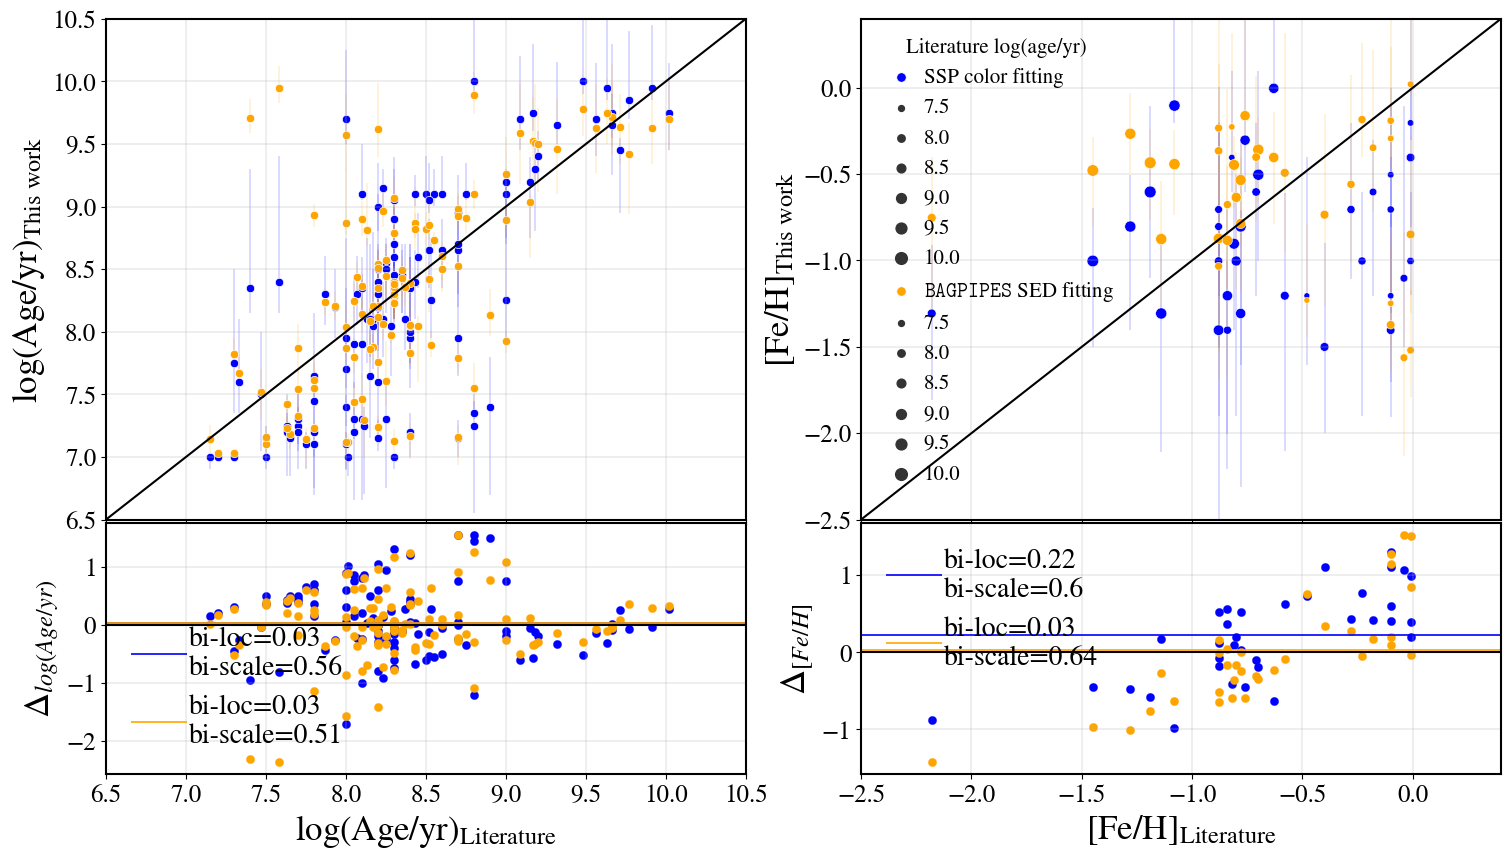

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(18, 10), dpi=100)
gs = fig.add_gridspec(nrows=2, ncols=2, wspace=0.18, hspace=0.01, height_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
x = 'logAge'
y = 'FeH'
xbagpipes = 'burst:age'
ybagpipes = 'burst:metallicity'

ax3.set_xlabel(r'log(Age/yr)$_{\rm Literature}$', fontsize=25)
ax1.set_ylabel(r'log(Age/yr)$_{\rm This \ work}$', fontsize=25)
ax4.set_xlabel(r'[Fe/H]$_{\rm Literature}$', fontsize=25)
ax2.set_ylabel(r'[Fe/H]$_{\rm This \ work}$', fontsize=25)
ax3.set_ylabel(r'$\Delta_{log(Age/yr)}$', fontsize=25)
ax4.set_ylabel(r'$\Delta_{[Fe/H]}$', fontsize=25)



ax1.set_xlim(6.5, 10.5)
ax3.set_xlim(6.5, 10.5)
ax1.set_ylim(6.5, 10.5)
ax1.grid(b=True, lw=0.3)
ax3.grid(b=True, lw=0.3)
ax1.plot([0, 1], [0, 1], transform=ax1.transAxes, color='black', lw=1.5)
ax3.hlines(y=0, xmin=6., xmax=11., color='black', lw=1.5)



sns.scatterplot(t_flag0knownage[x], t_flag0knownage['50_' + x], label='',
                color='blue', ax=ax1)#, size=(t_flag0knownage[y]), )
ax1.errorbar(x=t_flag0knownage[x], y=t_flag0knownage['50_' + x],
             yerr=[(t_flag0knownage['84_' + x] - t_flag0knownage['50_' + x]),
                  (t_flag0knownage['50_' + x] - t_flag0knownage['16_' + x])],
             color='blue', zorder=-1, fmt='-', ls='none', lw=0.2)

sns.scatterplot(tbagpipes_flag0knownage[x], np.log10(tbagpipes_flag0knownage[xbagpipes + '_50'] * 10**9),
                label=r'', color='orange', ax=ax1)#, size=(tbagpipes_flag0knownage[y]))
ax1.errorbar(x=tbagpipes_flag0knownage[x], y=np.log10(tbagpipes_flag0knownage[xbagpipes + '_50'] * 10**9), 
             yerr=[(np.log10(tbagpipes_flag0knownage[xbagpipes + '_84'] * 10**9) - np.log10(tbagpipes_flag0knownage[xbagpipes + '_50'] * 10**9)),
                  (np.log10(tbagpipes_flag0knownage[xbagpipes + '_50'] * 10**9) - np.log10(tbagpipes_flag0knownage[xbagpipes + '_16'] * 10**9))],
              color='orange', zorder=-1, fmt='-', ls='none', lw=0.2)
ax3.scatter(x=t_flag0knownage[x], y=t_flag0knownage[x] - t_flag0knownage['50_' + x], 
              color='blue', zorder=-1, lw=0.2, marker='o')
ax3.scatter(x=tbagpipes_flag0knownage[x], y=tbagpipes_flag0knownage[x] - np.log10(tbagpipes_flag0knownage[xbagpipes + '_50'] * 10**9), 
              color='orange', zorder=-1, lw=0.2, marker='o')


ax2.set_xlim(-2.5, 0.4)
ax4.set_xlim(-2.5, 0.4)
ax2.set_ylim(-2.5, 0.4)
ax2.grid(b=True, lw=0.3)
ax4.grid(b=True, lw=0.3)
ax2.plot([0, 1], [0, 1], transform=ax2.transAxes, lw=1.5, c='black')
ax4.hlines(y=0, xmin=-3., xmax=1, color='black', lw=1.5)

sns.scatterplot(t_flag0knownfeh[y], t_flag0knownfeh['50_' + y], label='SSP color fitting',
                size=(t_flag0knownfeh[x]), color='blue', ax=ax2)
ax2.errorbar(x=t_flag0knownfeh[y], y=t_flag0knownfeh['50_' + y],
             yerr=[(t_flag0knownfeh['84_' + y] - t_flag0knownfeh['50_' + y]),
                   (t_flag0knownfeh['50_' + y] - t_flag0knownfeh['16_' + y])],
             color='blue', zorder=-1, fmt='-', ls='none', lw=0.2)

sns.scatterplot(tbagpipes_flag0knownfeh[y], np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50'] * 0.02 / 0.0152),
                label=r'$\tt {BAGPIPES}$ SED fitting',
                size=(tbagpipes_flag0knownfeh[x]), color='orange', ax=ax2)
ax2.errorbar(x=tbagpipes_flag0knownfeh[y], y=np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50'] * 0.02 / 0.0152),
             yerr=[(np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_84'] * 0.02 / 0.0152) - np.log10(
                   tbagpipes_flag0knownfeh[ybagpipes + '_50'] * 0.02 / 0.0152)),
                   (np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50'] * 0.02 / 0.0152) - np.log10(
                    tbagpipes_flag0knownfeh[ybagpipes + '_16'] * 0.02 / 0.0152))],
             color='orange', zorder=-1, fmt='-', ls='none', lw=0.2, label='')
ax4.scatter(x=t_flag0knownfeh[y], y=t_flag0knownfeh[y] - t_flag0knownfeh['50_' + y], 
              color='blue', zorder=-1, lw=0.2, marker='o')
ax4.scatter(x=tbagpipes_flag0knownfeh[y], y=tbagpipes_flag0knownfeh[y] - np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50'] * 0.02/0.0152), 
              color='orange', zorder=-1, lw=0.2, marker='o')


hand, labl = ax2.get_legend_handles_labels()

ax2.legend(title='Literature log(age/yr)', frameon=False, fontsize='15',
           title_fontsize='15', loc='best', handletextpad=0.1) #, bbox_to_anchor=(1, 1.05)


x_ssp = t_flag0knownage[x] - t_flag0knownage['50_' + x]
y_ssp = t_flag0knownfeh[y] - t_flag0knownfeh['50_' + y]
x_b = tbagpipes_flag0knownage[x] - np.log10(tbagpipes_flag0knownage[xbagpipes + '_50'] * 10**9)
y_b = tbagpipes_flag0knownfeh[y] - np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50'] * 0.02/0.0152)

location = round(biweight_location(x_ssp), 2)
scale = round(biweight_scale(x_ssp), 2)
ax3.hlines(location, 6, 11, color='blue', label='bi-loc=' + str(location) + '\n' + 'bi-scale=' + str(scale), lw=1.2)
location = round(biweight_location(x_b), 2)
scale = round(biweight_scale(x_b), 2)
ax3.hlines(location, 6, 11, color='orange', label='bi-loc=' + str(location) + '\n' +'bi-scale=' + str(scale), lw=1.2)
ax3.legend(frameon=False, fontsize='20',
           loc='best', handletextpad=0.1)

location = round(biweight_location(y_ssp), 2)
scale = round(biweight_scale(y_ssp), 2)
ax4.hlines(location, -3, 1, color='blue', label='bi-loc=' + str(location) + '\n' + 'bi-scale=' + str(scale), lw=1.2)
location = round(biweight_location(x_b), 2)
scale = round(biweight_scale(y_b), 2)
ax4.hlines(location, -3, 1, color='orange', label='bi-loc=' + str(location) + '\n' +'bi-scale=' + str(scale), lw=1.2)
ax4.legend(frameon=False, fontsize='20',
           loc='best', handletextpad=0.1)

ax1.set(xlabel=None)
ax2.set(xlabel=None)
ax1.xaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])

ax1.yaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)
ax3.xaxis.set_tick_params(labelsize=18)

ax2.yaxis.set_tick_params(labelsize=18)
ax4.yaxis.set_tick_params(labelsize=18)
ax4.xaxis.set_tick_params(labelsize=18)


#plt.tight_layout()
plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/litcomparison.png', dpi=100, bbox_inches='tight')

# KDE distributions for calibration sample

8.26896376356948 0.8674589939852458 -0.979004015351459 0.40646236311249356
8.347351313486529 0.8058821304918738 -0.6236238558565786 0.39617117288110076
8.348230088495576 0.6002598701071512 -0.6551428571428572 0.4765373403361943
E(B-V)
------
0.0738
0.0855
0.0949
0.0907
0.0831
0.0918
0.0836
0.0962
0.1045
 0.072
   ...
0.0751
 0.082
0.1051
0.0791
0.1068
0.1192
0.0734
 0.093
0.0792
0.1016
0.1192
Length = 70 rows


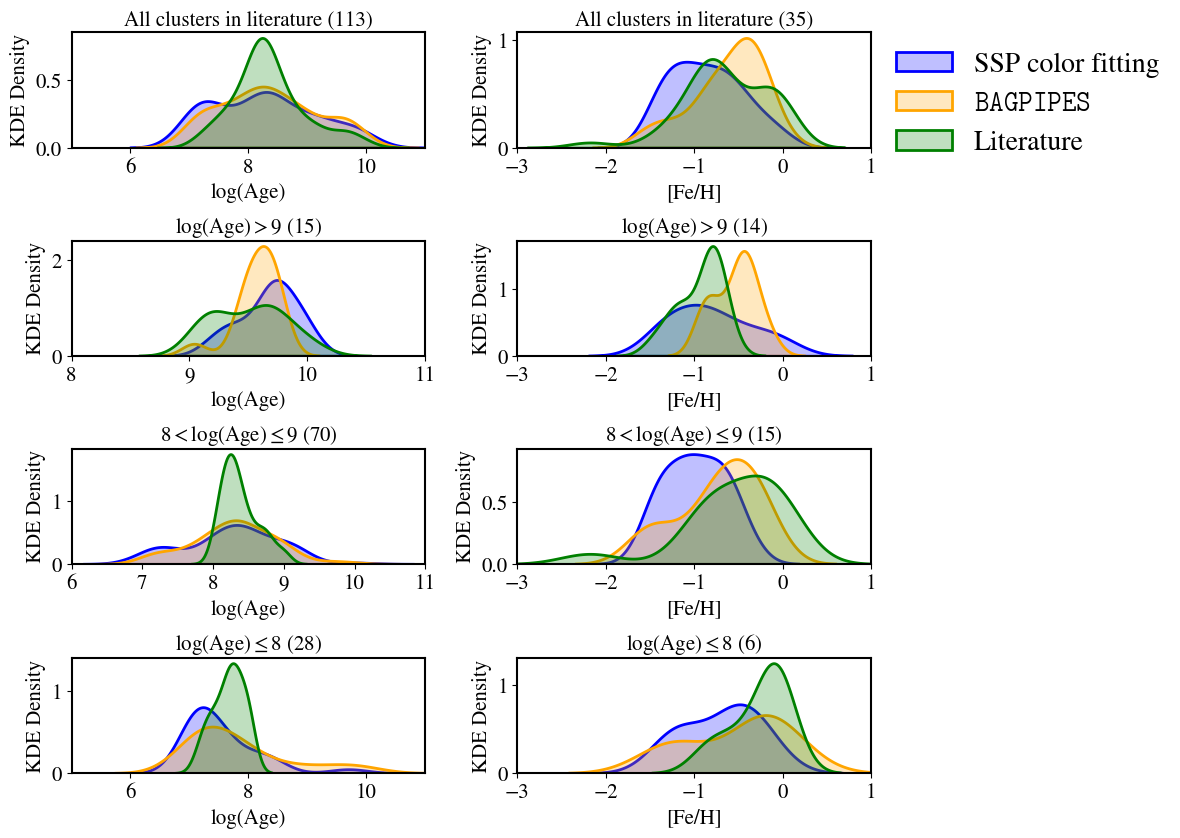

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(11.69, 8.27), dpi=100)
gs = fig.add_gridspec(nrows=4, ncols=2)
x = 'logAge'
y = 'FeH'
xbagpipes = 'burst:age'
ybagpipes = 'burst:metallicity'
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, 0])
ax8 = fig.add_subplot(gs[3, 1])
ax1.set_xlabel('log(Age)', fontsize=15)
ax2.set_xlabel('[Fe/H]', fontsize=15)
ax3.set_xlabel('log(Age)', fontsize=15)
ax4.set_xlabel('[Fe/H]', fontsize=15)
ax5.set_xlabel('log(Age)', fontsize=15)
ax6.set_xlabel('[Fe/H]', fontsize=15)
ax7.set_xlabel('log(Age)', fontsize=15)
ax8.set_xlabel('[Fe/H]', fontsize=15)
ax1.set_ylabel('KDE Density', fontsize=15)
ax2.set_ylabel('KDE Density', fontsize=15)
ax3.set_ylabel('KDE Density', fontsize=15)
ax4.set_ylabel('KDE Density', fontsize=15)
ax5.set_ylabel('KDE Density', fontsize=15)
ax6.set_ylabel('KDE Density', fontsize=15)
ax7.set_ylabel('KDE Density', fontsize=15)
ax8.set_ylabel('KDE Density', fontsize=15)
ax1.set_xlim(5,11)
ax2.set_xlim(-3,1)
ax3.set_xlim(8,11)
ax4.set_xlim(-3,1)
ax5.set_xlim(6,11)
ax6.set_xlim(-3,1)
ax7.set_xlim(5,11)
ax8.set_xlim(-3,1)
label_mycode='SSP color fitting'
label_bagpipes=r'$\tt{BAGPIPES}$'
label_literature='Literature'

ax1.set_title('All clusters in literature ('+str(len(np.unique(tbagpipes_flag0knownage['object'])))+')', fontsize = 15)
ax2.set_title('All clusters in literature ('+str(len(np.unique(tbagpipes_flag0knownfeh['object'])))+')', fontsize = 15)

ax3.set_title(r'$\log{(\rm Age)} > 9$ ('+str(len(np.unique(tbagpipes_flag0logage9['object'])))+')', fontsize = 15)
ax4.set_title(r'$\log{(\rm Age)} > 9$ ('+str(len(np.unique(tbagpipes_flag0knownfehlogage9['object'])))+')', fontsize = 15)

ax5.set_title(r'$8 < \log{(\rm Age)} \leq 9$ ('+str(len((tbagpipes_flag0logage8to9['object'])))+')', fontsize = 15)
ax6.set_title(r'$8 < \log{(\rm Age)} \leq 9$ ('+str(len((tbagpipes_flag0knownfehlogage8to9['object'])))+')', fontsize = 15)

ax7.set_title(r'$\log{(\rm Age)} \leq 8$ ('+str(len((tbagpipes_flag0lesslogage8['object'])))+')', fontsize = 15)
ax8.set_title(r'$\log{(\rm Age)} \leq 8$ ('+str(len((tbagpipes_flag0knownfehlesslogage8['object'])))+')', fontsize = 15)
# ----------------------------------------------------------------------------------------------------
# ALL
sns.kdeplot(t_flag0knownage['50_' + x], ax=ax1, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownage[xbagpipes + '_50']*10**9), ax=ax1, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_flag0knownage[x], ax=ax1, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0knownfeh['50_' + y], ax=ax2, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50']*0.02/0.0152), ax=ax2, shade=True, lw=2, label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_flag0knownfeh[y], ax=ax2, shade=True, lw=2, label=label_literature, color='green')
#sns.kdeplot(APOGEE_SMC['[Fe/H]'], ax=ax2, shade=True, lw=2, label='APOGEE', color='yellow')

print(np.mean(t_flag0knownage['50_' + x]), np.std(t_flag0knownage['50_' + x]), np.mean(t_flag0knownage['50_' + y]), np.std(t_flag0knownage['50_' + y]))
print(np.mean(np.log10(tbagpipes_flag0knownage[xbagpipes + '_50']*10**9)), np.std(np.log10(tbagpipes_flag0knownage[xbagpipes + '_50']*10**9)),
      np.mean(np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50']*0.02/0.0152)), np.std(np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50']*0.02/0.0152)))
print(np.mean(tbagpipes_flag0knownage[x]), np.std(tbagpipes_flag0knownage[x]), np.mean(tbagpipes_flag0knownfeh[y]), np.std(tbagpipes_flag0knownfeh[y]))
#----------------------------------------------------------------------------------------------------
# ref_log(age/yr) > 9
sns.kdeplot(t_flag0logage9['50_' + x], ax=ax3, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0logage9[xbagpipes + '_50'] * 10 ** 9), ax=ax3, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_flag0logage9[x], ax=ax3, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0knownfehlogage9['50_' + y], ax=ax4, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownfehlogage9[ybagpipes + '_50']*0.02/0.0152), ax=ax4, shade=True, lw=2, label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_flag0knownfehlogage9[y], ax=ax4, shade=True, lw=2, label=label_literature, color='green')
#----------------------------------------------------------------------------------------------------
# 8 < ref_log(age/yr) <= 9
print(t_flag0logage8to9['E(B-V)'])
sns.kdeplot(t_flag0logage8to9['50_' + x], ax=ax5, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0logage8to9[xbagpipes + '_50'] * 10 ** 9), ax=ax5, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_flag0logage8to9[x], ax=ax5, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0knownfehlogage8to9['50_' + y], ax=ax6, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownfehlogage8to9[ybagpipes + '_50']*0.02/0.0152), ax=ax6, shade=True, lw=2, label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_flag0knownfehlogage8to9[y], ax=ax6, shade=True, lw=2, label=label_literature, color='green')
#----------------------------------------------------------------------------------------------------
# ref_log(age/yr) <= 8
t_flag0lesslogage8['E(B-V)']
sns.kdeplot(t_flag0lesslogage8['50_' + x], ax=ax7, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0lesslogage8[xbagpipes + '_50'] * 10 ** 9), ax=ax7, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_flag0lesslogage8[x], ax=ax7, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0knownfehlesslogage8['50_' + y], ax=ax8, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownfehlesslogage8[ybagpipes + '_50']*0.02/0.0152), ax=ax8, shade=True, lw=2,
            label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_flag0knownfehlesslogage8[y], ax=ax8, shade=True, lw=2, label=label_literature, color='green')
#----- -----------------------------------------------------------------------------------------------
ax2.legend(bbox_to_anchor=(1.0, 1.05), loc="upper left", frameon=False, fontsize=20)
plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/kde_dists_cutted.pdf', dpi=100) 

# KDE distributions for clusters with age and metallicity



8.612774189579895 0.8674589939852458 -0.979004015351459 0.40646236311249356
8.641246272891097 0.8058821304918738 -0.6236238558565786 0.39617117288110076
8.659428571428569 0.7365865010094794 -0.6551428571428572 0.4765373403361943
E(B-V)
------
0.0855
0.0836
0.0887
0.0823
0.1022
0.0921
0.0918
0.0801
0.0853
0.1016
0.0904
0.0711
0.1068
0.1016
0.1192


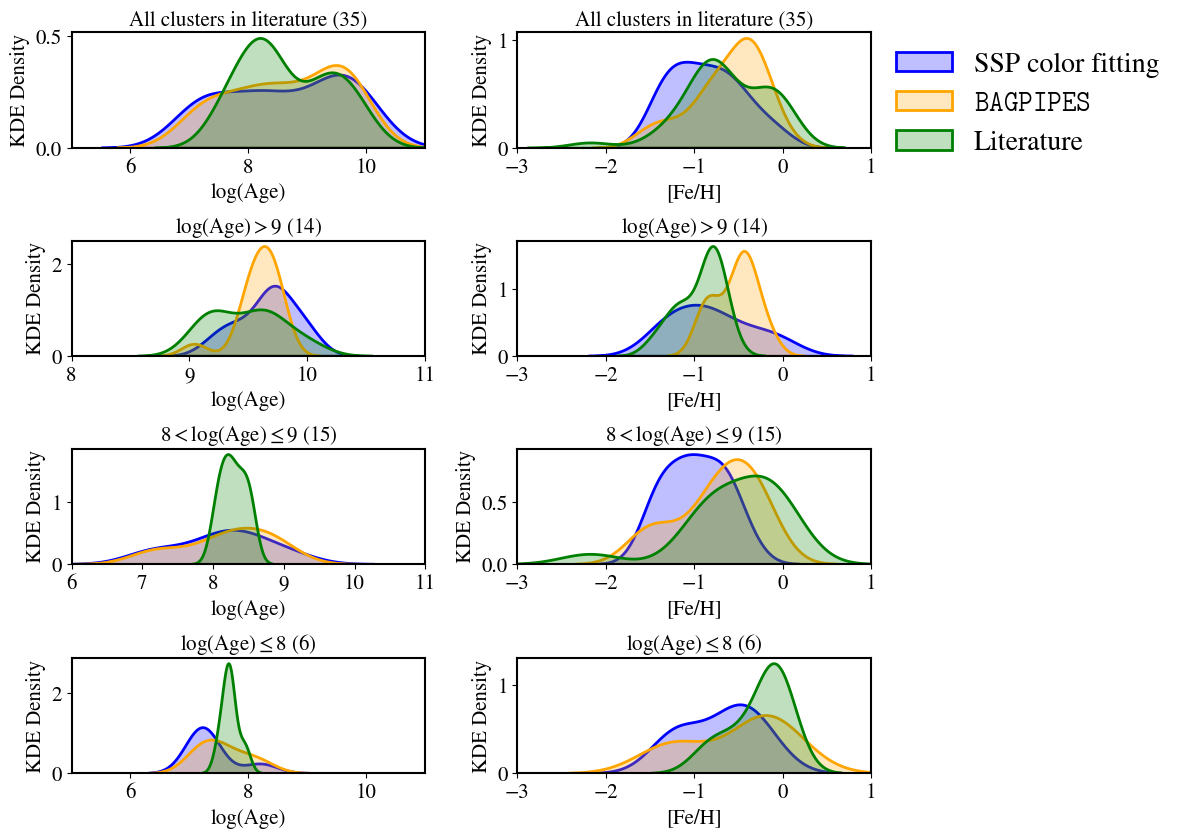

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(11.69, 8.27), dpi=100)
gs = fig.add_gridspec(nrows=4, ncols=2)
x = 'logAge'
y = 'FeH'
xbagpipes = 'burst:age'
ybagpipes = 'burst:metallicity'
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, 0])
ax8 = fig.add_subplot(gs[3, 1])
ax1.set_xlabel('log(Age)', fontsize=15)
ax2.set_xlabel('[Fe/H]', fontsize=15)
ax3.set_xlabel('log(Age)', fontsize=15)
ax4.set_xlabel('[Fe/H]', fontsize=15)
ax5.set_xlabel('log(Age)', fontsize=15)
ax6.set_xlabel('[Fe/H]', fontsize=15)
ax7.set_xlabel('log(Age)', fontsize=15)
ax8.set_xlabel('[Fe/H]', fontsize=15)
ax1.set_ylabel('KDE Density', fontsize=15)
ax2.set_ylabel('KDE Density', fontsize=15)
ax3.set_ylabel('KDE Density', fontsize=15)
ax4.set_ylabel('KDE Density', fontsize=15)
ax5.set_ylabel('KDE Density', fontsize=15)
ax6.set_ylabel('KDE Density', fontsize=15)
ax7.set_ylabel('KDE Density', fontsize=15)
ax8.set_ylabel('KDE Density', fontsize=15)
ax1.set_xlim(5,11)
ax2.set_xlim(-3,1)
ax3.set_xlim(8,11)
ax4.set_xlim(-3,1)
ax5.set_xlim(6,11)
ax6.set_xlim(-3,1)
ax7.set_xlim(5,11)
ax8.set_xlim(-3,1)
label_mycode='SSP color fitting'
label_bagpipes=r'$\tt{BAGPIPES}$'
label_literature='Literature'

ax1.set_title('All clusters in literature ('+str(len(np.unique(tbagpipes_flag0knownfeh['object'])))+')', fontsize = 15)
ax2.set_title('All clusters in literature ('+str(len(np.unique(tbagpipes_flag0knownfeh['object'])))+')', fontsize = 15)

ax3.set_title(r'$\log{(\rm Age)} > 9$ ('+str(len(np.unique(tbagpipes_flag0knownfehlogage9['object'])))+')', fontsize = 15)
ax4.set_title(r'$\log{(\rm Age)} > 9$ ('+str(len(np.unique(tbagpipes_flag0knownfehlogage9['object'])))+')', fontsize = 15)

ax5.set_title(r'$8 < \log{(\rm Age)} \leq 9$ ('+str(len((tbagpipes_flag0knownfehlogage8to9['object'])))+')', fontsize = 15)
ax6.set_title(r'$8 < \log{(\rm Age)} \leq 9$ ('+str(len((tbagpipes_flag0knownfehlogage8to9['object'])))+')', fontsize = 15)

ax7.set_title(r'$\log{(\rm Age)} \leq 8$ ('+str(len((tbagpipes_flag0knownfehlesslogage8['object'])))+')', fontsize = 15)
ax8.set_title(r'$\log{(\rm Age)} \leq 8$ ('+str(len((tbagpipes_flag0knownfehlesslogage8['object'])))+')', fontsize = 15)
# ----------------------------------------------------------------------------------------------------
# ALL
sns.kdeplot(t_flag0knownfeh['50_' + x], ax=ax1, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownfeh[xbagpipes + '_50']*10**9), ax=ax1, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_flag0knownfeh[x], ax=ax1, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0knownfeh['50_' + y], ax=ax2, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50']*0.02/0.0152), ax=ax2, shade=True, lw=2, label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_flag0knownfeh[y], ax=ax2, shade=True, lw=2, label=label_literature, color='green')
#sns.kdeplot(APOGEE_SMC['[Fe/H]'], ax=ax2, shade=True, lw=2, label='APOGEE', color='yellow')

print(np.mean(t_flag0knownfeh['50_' + x]), np.std(t_flag0knownage['50_' + x]), np.mean(t_flag0knownage['50_' + y]), np.std(t_flag0knownage['50_' + y]))
print(np.mean(np.log10(tbagpipes_flag0knownfeh[xbagpipes + '_50']*10**9)), np.std(np.log10(tbagpipes_flag0knownage[xbagpipes + '_50']*10**9)),
      np.mean(np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50']*0.02/0.0152)), np.std(np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50']*0.02/0.0152)))
print(np.mean(tbagpipes_flag0knownfeh[x]), np.std(tbagpipes_flag0knownfeh[x]), np.mean(tbagpipes_flag0knownfeh[y]), np.std(tbagpipes_flag0knownfeh[y]))
#----------------------------------------------------------------------------------------------------
# ref_log(age/yr) > 9
sns.kdeplot(t_flag0knownfehlogage9['50_' + x], ax=ax3, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownfehlogage9[xbagpipes + '_50'] * 10 ** 9), ax=ax3, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_flag0knownfehlogage9[x], ax=ax3, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0knownfehlogage9['50_' + y], ax=ax4, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownfehlogage9[ybagpipes + '_50']*0.02/0.0152), ax=ax4, shade=True, lw=2, label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_flag0knownfehlogage9[y], ax=ax4, shade=True, lw=2, label=label_literature, color='green')
#----------------------------------------------------------------------------------------------------
# 8 < ref_log(age/yr) <= 9
print(t_flag0knownfehlogage8to9['E(B-V)'])
sns.kdeplot(t_flag0knownfehlogage8to9['50_' + x], ax=ax5, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownfehlogage8to9[xbagpipes + '_50'] * 10 ** 9), ax=ax5, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_flag0knownfehlogage8to9[x], ax=ax5, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0knownfehlogage8to9['50_' + y], ax=ax6, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownfehlogage8to9[ybagpipes + '_50']*0.02/0.0152), ax=ax6, shade=True, lw=2, label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_flag0knownfehlogage8to9[y], ax=ax6, shade=True, lw=2, label=label_literature, color='green')
#----------------------------------------------------------------------------------------------------
# ref_log(age/yr) <= 8
sns.kdeplot(t_flag0knownfehlesslogage8['50_' + x], ax=ax7, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownfehlesslogage8[xbagpipes + '_50'] * 10 ** 9), ax=ax7, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_flag0knownfehlesslogage8[x], ax=ax7, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0knownfehlesslogage8['50_' + y], ax=ax8, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0knownfehlesslogage8[ybagpipes + '_50']*0.02/0.0152), ax=ax8, shade=True, lw=2,
            label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_flag0knownfehlesslogage8[y], ax=ax8, shade=True, lw=2, label=label_literature, color='green')
#----- -----------------------------------------------------------------------------------------------
ax2.legend(bbox_to_anchor=(1.0, 1.05), loc="upper left", frameon=False, fontsize=20)
plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/kde_dists_age&feh.pdf', dpi=100) 

# KDE distributions for all sample

8.284977548581221 0.8973652995472876 -1.0154373049822865 0.44433558776233006
8.351806831806947 0.8666031170934414 -0.699742663665091 0.6281795410146878


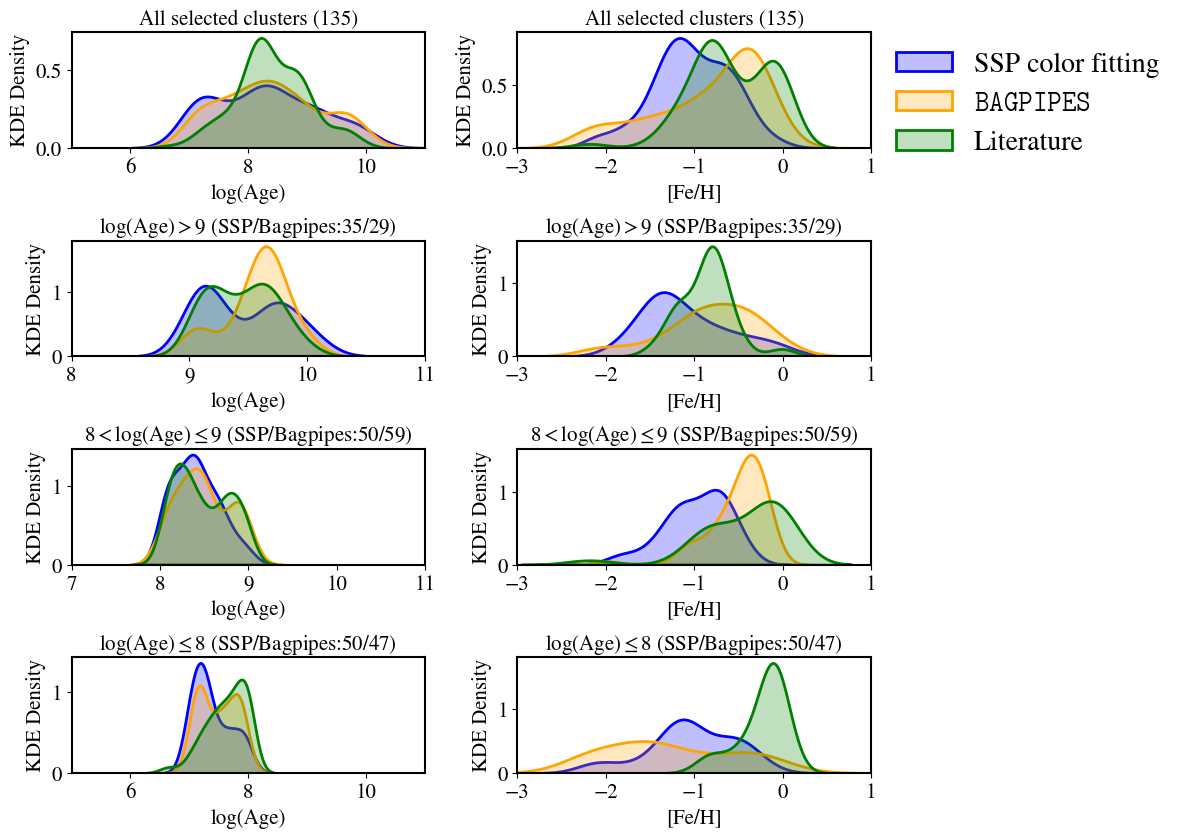

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(11.69, 8.27), dpi=100)
gs = fig.add_gridspec(nrows=4, ncols=2)
x = 'logAge'
y = 'FeH'
xbagpipes = 'burst:age'
ybagpipes = 'burst:metallicity'
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, 0])
ax8 = fig.add_subplot(gs[3, 1])
ax1.set_xlabel('log(Age)', fontsize=15)
ax2.set_xlabel('[Fe/H]', fontsize=15)
ax3.set_xlabel('log(Age)', fontsize=15)
ax4.set_xlabel('[Fe/H]', fontsize=15)
ax5.set_xlabel('log(Age)', fontsize=15)
ax6.set_xlabel('[Fe/H]', fontsize=15)
ax7.set_xlabel('log(Age)', fontsize=15)
ax8.set_xlabel('[Fe/H]', fontsize=15)
ax1.set_ylabel('KDE Density', fontsize=15)
ax2.set_ylabel('KDE Density', fontsize=15)
ax3.set_ylabel('KDE Density', fontsize=15)
ax4.set_ylabel('KDE Density', fontsize=15)
ax5.set_ylabel('KDE Density', fontsize=15)
ax6.set_ylabel('KDE Density', fontsize=15)
ax7.set_ylabel('KDE Density', fontsize=15)
ax8.set_ylabel('KDE Density', fontsize=15)
ax1.set_xlim(5,11)
ax2.set_xlim(-3,1)
ax3.set_xlim(8,11)
ax4.set_xlim(-3,1)
ax5.set_xlim(7,11)
ax6.set_xlim(-3,1)
ax7.set_xlim(5,11)
ax8.set_xlim(-3,1)
label_mycode='SSP color fitting'
label_bagpipes=r'$\tt{BAGPIPES}$'
label_literature='Literature'

ax1.set_title('All selected clusters ('+str(len((tbagpipes_flag0['object'])))+')', fontsize = 15)
ax2.set_title('All selected clusters ('+str(len((tbagpipes_flag0['object'])))+')', fontsize = 15)

ax3.set_title(r'$\log{(\rm Age)} > 9$ (''SSP/Bagpipes:'+str(len((t_flag0logage9_calc['object'])))+'/'+str(len((tbagpipes_flag0logage9_calc['object'])))+')', fontsize = 15)
ax4.set_title(r'$\log{(\rm Age)} > 9$ (''SSP/Bagpipes:'+str(len((t_flag0logage9_calc['object'])))+'/'+str(len((tbagpipes_flag0logage9_calc['object'])))+')', fontsize = 15)

ax5.set_title(r'$8 < \log{(\rm Age)} \leq 9$ (''SSP/Bagpipes:'+str(len((t_flag0logage8to9_calc['object'])))+'/'+str(len((tbagpipes_flag0logage8to9_calc['object'])))+')', fontsize = 15)
ax6.set_title(r'$8 < \log{(\rm Age)} \leq 9$ (''SSP/Bagpipes:'+str(len((t_flag0logage8to9_calc['object'])))+'/'+str(len((tbagpipes_flag0logage8to9_calc['object'])))+')', fontsize = 15)

ax7.set_title(r'$\log{(\rm Age)} \leq 8$ (''SSP/Bagpipes:'+str(len((t_flag0lesslogage8_calc['object'])))+'/'+str(len((tbagpipes_flag0lesslogage8_calc['object'])))+')', fontsize = 15)
ax8.set_title(r'$\log{(\rm Age)} \leq 8$ (''SSP/Bagpipes:'+str(len((t_flag0lesslogage8_calc['object'])))+'/'+str(len((tbagpipes_flag0lesslogage8_calc['object'])))+')', fontsize = 15)
# ----------------------------------------------------------------------------------------------------
# ALL
sns.kdeplot(t_flag0['50_' + x], ax=ax1, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0[xbagpipes + '_50']*10**9), ax=ax1, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_knownage[x], ax=ax1, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0['50_' + y], ax=ax2, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0[ybagpipes + '_50']*0.02/0.0152), ax=ax2, shade=True, lw=2, label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_knownfeh[y], ax=ax2, shade=True, lw=2, label=label_literature, color='green')
#sns.kdeplot(APOGEE_SMC['[Fe/H]'], ax=ax2, shade=True, lw=2, label='APOGEE', color='yellow')

print(biweight_location(t_flag0['50_' + x]), biweight_scale(t_flag0['50_' + x]), biweight_location(t_flag0['50_' + y]), biweight_scale(t_flag0['50_' + y]))
print(biweight_location(np.log10(tbagpipes_flag0[xbagpipes + '_50']*10**9)), biweight_scale(np.log10(tbagpipes_flag0[xbagpipes + '_50']*10**9)),
      biweight_location(np.log10(tbagpipes_flag0[ybagpipes + '_50']*0.02/0.0152)), biweight_scale(np.log10(tbagpipes_flag0[ybagpipes + '_50']*0.02/0.0152)))


#----------------------------------------------------------------------------------------------------
# ref_log(age/yr)>9
sns.kdeplot(t_flag0logage9_calc['50_' + x], ax=ax3, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0logage9_calc[xbagpipes + '_50'] * 10 ** 9), ax=ax3, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_knownage[tbagpipes_knownage[x]>9][x], ax=ax3, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0logage9_calc['50_' + y], ax=ax4, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0logage9_calc[ybagpipes + '_50']*0.02/0.0152), ax=ax4, shade=True, lw=2, label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_knownfeh[tbagpipes_knownfeh[x]>9][y], ax=ax4, shade=True, lw=2, label=label_literature, color='green')
#----------------------------------------------------------------------------------------------------
# 8<ref_log(age/yr)<=9
sns.kdeplot(t_flag0logage8to9_calc['50_' + x], ax=ax5, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0logage8to9_calc[xbagpipes + '_50'] * 10 ** 9), ax=ax5, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_knownage[(tbagpipes_knownage[x]>8) & (tbagpipes_knownage[x]<=9)][x], ax=ax5, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0logage8to9_calc['50_' + y], ax=ax6, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0logage8to9_calc[ybagpipes + '_50']*0.02/0.0152), ax=ax6, shade=True, lw=2, label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_knownfeh[(tbagpipes_knownfeh[x]>8) & (tbagpipes_knownfeh[x]<=9)][y], ax=ax6, shade=True, lw=2, label=label_literature, color='green')
#----------------------------------------------------------------------------------------------------
# ref_log(age/yr)<=8
sns.kdeplot(t_flag0lesslogage8_calc['50_' + x], ax=ax7, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0lesslogage8_calc[xbagpipes + '_50'] * 10 ** 9), ax=ax7, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_knownage[tbagpipes_knownage[x]<=8][x], ax=ax7, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0lesslogage8_calc['50_' + y], ax=ax8, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0lesslogage8_calc[ybagpipes + '_50']*0.02/0.0152), ax=ax8, shade=True, lw=2,
            label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_knownfeh[tbagpipes_knownfeh[x]<=8][y], ax=ax8, shade=True, lw=2, label=label_literature, color='green')

#----- -----------------------------------------------------------------------------------------------
ax2.legend(bbox_to_anchor=(1.0, 1.05), loc="upper left", frameon=False, fontsize=20)
plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/kde_dists_final_cutted.pdf', dpi=100) 

# Age-metallicity relation for BAGPIPES

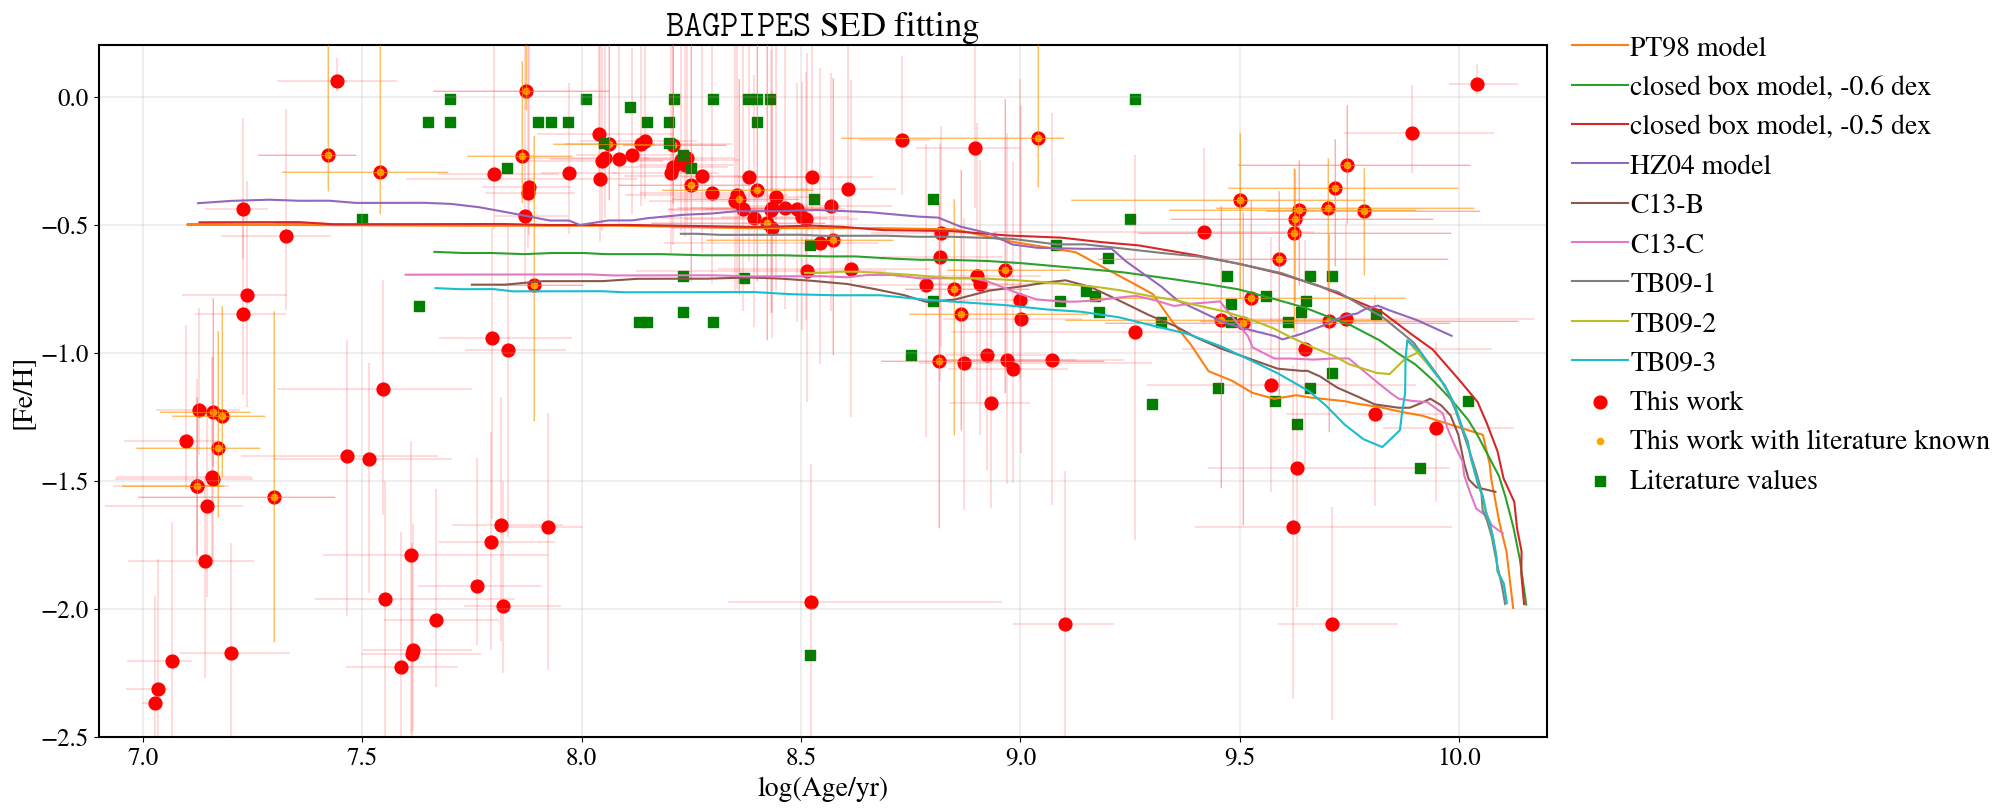

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(20, 8), dpi=100)
gs2 = fig.add_gridspec(nrows=1, ncols=1)

#gs2 = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[2, 1], height_ratios=[1, 2])

#ax1 = fig.add_subplot(gs2[0, 0])
#ax3 = fig.add_subplot(gs2[1, 1])

ax2 = fig.add_subplot(gs2[0, 0])


ax2.set_xlabel('log(Age/yr)', fontsize=20)
ax2.set_ylabel('[Fe/H]', fontsize=20)
ax2.set_title(r'$\tt {BAGPIPES}$ SED fitting', fontsize=25)
ax2.set_xlim(6.9,10.2)
ax2.set_ylim(-2.5,0.2)
ax2.grid(b=True, lw=0.3)
#ax2.axes.get_yaxis().set_visible(False)

# ####################################################################################################################

# ax1.hist(np.log10(photometry_bagpipes[xbagpipes + '_50'] * 10 ** 9),
#                  label='This work', color='red')
# ax1.hist(photometry_table_full_knownfeh[x], label='Literature values', color='green')

# ####################################################################################################################

# ax3.hist(np.log10(photometry_bagpipes[ybagpipes + '_50'] * 0.02 / 0.0152), label='This work', color='red', orientation='horizontal')
# ax3.hist(photometry_table_full_knownfeh[y], label='Literature values', color='green', orientation='horizontal')
####################################################################################################################
#ax2.plot(pt98_analytical_models_SMC['age'], pt98_analytical_models_SMC['[Fe/H]'], zorder=20)
ax2.plot(pt98_analytical_models_SMC['logage'], pt98_analytical_models_SMC['[Fe/H]'], zorder=20, label='PT98 model', color='C1', lw=1.5)
ax2.plot(closedbox06_SMC['logage'], closedbox06_SMC['[Fe/H]'], zorder=20, label='closed box model, -0.6 dex', color='C2', lw=1.5)
ax2.plot(closedbox05_SMC['logage'], closedbox05_SMC['[Fe/H]'], zorder=20, label='closed box model, -0.5 dex', color='C3', lw=1.5)
ax2.plot(hz04_SMC['logage'], hz04_SMC['[Fe/H]'], zorder=20, label='HZ04 model', color='C4', lw=1.5)
ax2.plot(C13_B_SMC['logage'], C13_B_SMC['[Fe/H]'], zorder=20, label='C13-B', color='C5', lw=1.5)
ax2.plot(C13_C_SMC['logage'], C13_C_SMC['[Fe/H]'], zorder=20, label='C13-C', color='C6', lw=1.5)
ax2.plot(TB09_1_SMC['logage'], TB09_1_SMC['[Fe/H]'], zorder=20, label='TB09-1', color='C7', lw=1.5)
ax2.plot(TB09_2_SMC['logage'], TB09_2_SMC['[Fe/H]'], zorder=20, label='TB09-2', color='C8', lw=1.5)
ax2.plot(TB09_3_SMC['logage'], TB09_3_SMC['[Fe/H]'], zorder=20, label='TB09-3', color='C9', lw=1.5)

#print(photometry_table_cut2.colnames)
#photometry_tc2 = join(results_cat_bagpipes, photometry_table_cut2)
#print(photometry_tc2.colnames)
#ax2.scatter(np.log10(photometry_tc2[xbagpipes + '_50'] * 10 **9), 
#            np.log10(photometry_tc2[ybagpipes + '_50'] * 0.02/0.0152), 
#            color='pink')


ax2.scatter(np.log10(tbagpipes_flag0[xbagpipes + '_50'] * 10 ** 9),
                 np.log10(tbagpipes_flag0[ybagpipes + '_50'] * 0.02 / 
                 0.0152), label='This work', s=85, color='red')
ax2.errorbar(x=np.log10(tbagpipes_flag0[xbagpipes + '_50'] * 10 ** 9), y=np.log10(tbagpipes_flag0[ybagpipes + '_50'] * 0.02 / 0.0152),
             xerr =[(np.log10(tbagpipes_flag0[xbagpipes + '_84'] * 10 ** 9) - np.log10(tbagpipes_flag0[xbagpipes + '_50'] * 10 ** 9)),
                   (np.log10(tbagpipes_flag0[xbagpipes + '_50'] * 10 ** 9) - np.log10(tbagpipes_flag0[xbagpipes + '_16'] * 10 ** 9))], 
             yerr=[(np.log10(tbagpipes_flag0[ybagpipes + '_84'] * 0.02 / 0.0152) - np.log10(tbagpipes_flag0[ybagpipes + '_50'] * 0.02 / 0.0152)),
                   (np.log10(tbagpipes_flag0[ybagpipes + '_50'] * 0.02 / 0.0152) - np.log10(tbagpipes_flag0[ybagpipes + '_16'] * 0.02 / 0.0152))],
             zorder=10, fmt='-', ls='none', lw=0.2, color='red')


# for i in range(len(tbagpipes_flag0knownfeh)):
#   ax2.plot([tbagpipes_flag0knownfeh[x][i], np.log10(tbagpipes_flag0knownfeh[xbagpipes + '_50'][i] * 10 ** 9)],
#            [tbagpipes_flag0knownfeh[y][i], np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50'][i] * 0.02 / 0.0152)],
#             color='black', zorder=-1)


ax2.scatter(np.log10(tbagpipes_flag0knownfeh[xbagpipes + '_50'] * 10 ** 9),
                   np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50'] * 0.02 / 0.0152), 
            label='This work with literature known', s=20, color='orange')

ax2.errorbar(x=np.log10(tbagpipes_flag0knownfeh[xbagpipes + '_50'] * 10**9), 
                y=np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50'] * 0.02 / 0.0152),
             xerr=[(np.log10(tbagpipes_flag0knownfeh[xbagpipes + '_84'] * 10**9) - np.log10(tbagpipes_flag0knownfeh[xbagpipes + '_50'] * 10**9)),
                  (np.log10(tbagpipes_flag0knownfeh[xbagpipes + '_50'] * 10**9) - np.log10(tbagpipes_flag0knownfeh[xbagpipes + '_16'] * 10**9))], 
            yerr=[(np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_84'] * 0.02 / 0.0152) - np.log10(
                   tbagpipes_flag0knownfeh[ybagpipes + '_50'] * 0.02 / 0.0152)),
                   (np.log10(tbagpipes_flag0knownfeh[ybagpipes + '_50'] * 0.02 / 0.0152) - np.log10(
                   tbagpipes_flag0knownfeh[ybagpipes + '_16'] * 0.02 / 0.0152))],
                   zorder=11, fmt='-', ls='none', lw=0.4, color='orange')

ax2.scatter(tbagpipes_knownfeh[x], tbagpipes_knownfeh[y], label='Literature values', marker='s', s=60, color='green')

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)

ax2.legend(ncol=1, bbox_to_anchor=(1.0, 1.05), loc="upper left", handletextpad=0.1, frameon=False, fontsize=20)
plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/amr_cutted_bagpipes.png', dpi=100)

# AMR related with color-color diagram BAGPIPES

/usr/local/lib/python3.7/dist-packages/astropy/table/column.py:1157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)
/usr/local/lib/python3.7/dist-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/usr/local/lib/python3.7/dist-packages/astropy/table/column.py:1157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)
/usr/local/lib/python3.7/dist-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/usr/local/lib/python3.7/dist-pack

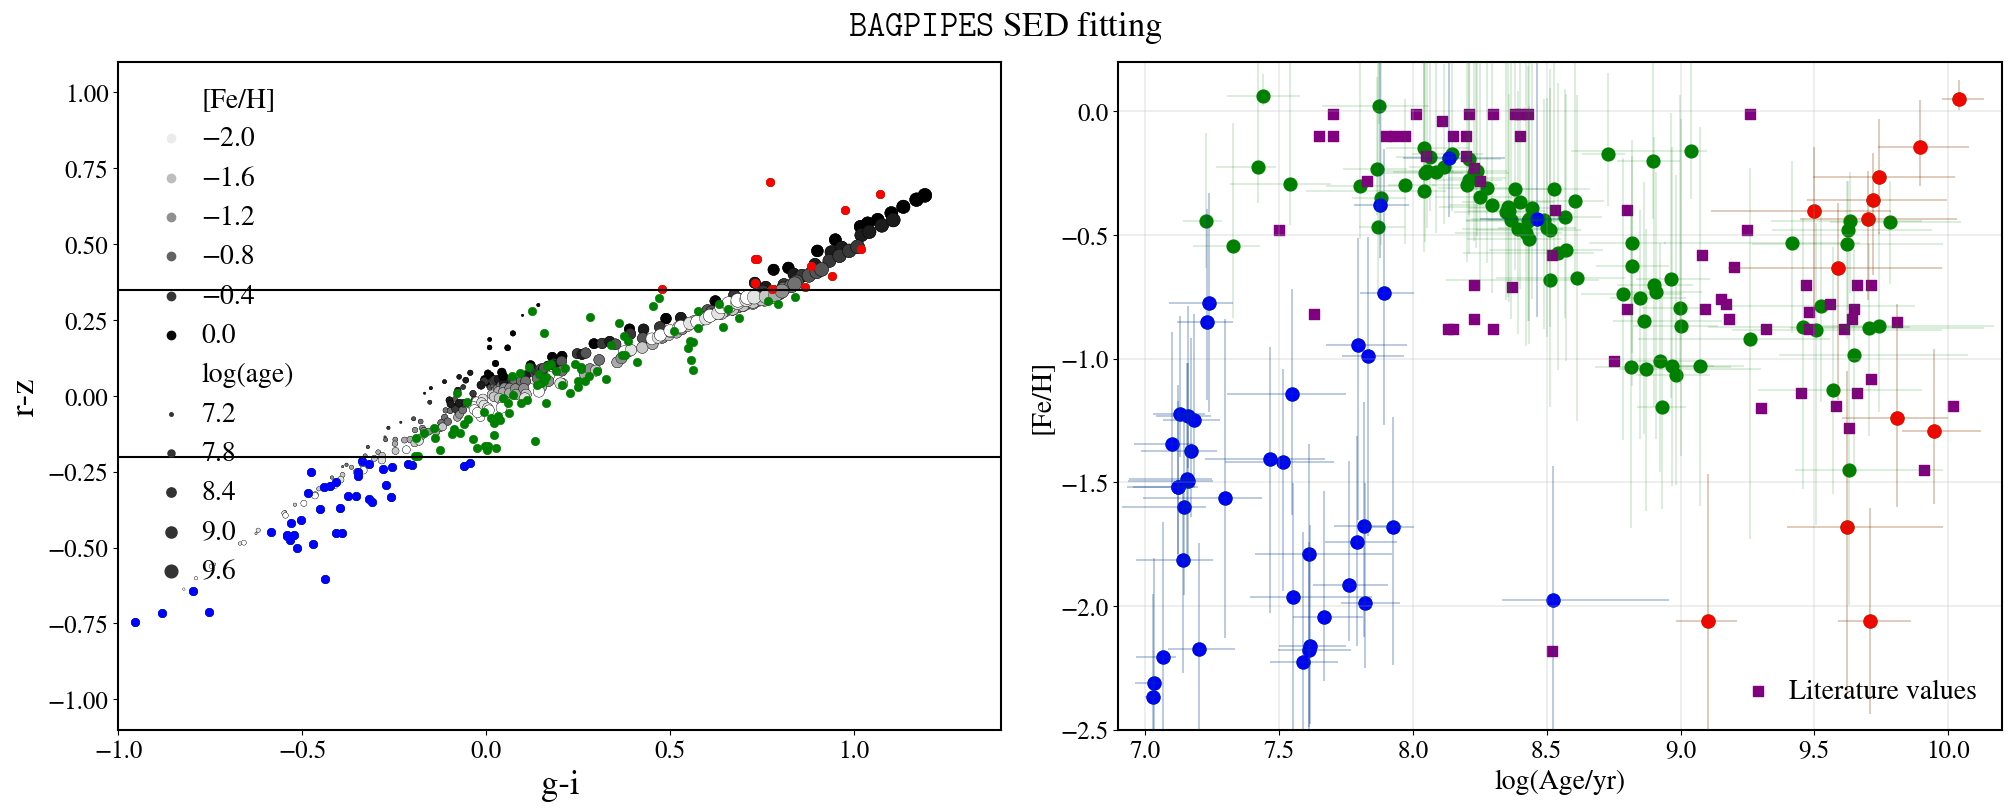

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(20, 8), dpi=100)
gs = fig.add_gridspec(nrows=1, ncols=2)
plt.suptitle(r'$\tt {BAGPIPES}$ SED fitting', fontsize=25)

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_xlim(-1.,1.4)
ax1.set_ylim(-1.1,1.1)
ax1.set_xlabel('g-i', fontsize=25)
ax1.set_ylabel('r-z', fontsize=25)

ax1.axhline(y=-0.2, color='black')
ax1.axhline(y=0.35, color='black')

tbagpipes_flag0blue = tbagpipes_flag0[(tbagpipes_flag0['rSDSS'] - tbagpipes_flag0['zSDSS']) < -0.2]
tbagpipes_flag0red = tbagpipes_flag0[(tbagpipes_flag0['rSDSS'] - tbagpipes_flag0['zSDSS']) > 0.35]



# ###############################################################################
model.rename_column('age', 'log(age)') 
model.rename_column('metallicity', '[Fe/H]') 


sns.scatterplot(data=model, x=g-i, y=r-z, size=np.log10(model['log(age)']*10**9),
                marker='o', hue=np.log10(model['[Fe/H]']*0.02/0.0152), legend='brief', 
                alpha=1, sizes=(0, 100), palette='binary', ax=ax1, edgecolor='black', zorder=0)

model.rename_column('log(age)', 'age') 
model.rename_column('[Fe/H]', 'metallicity') 

sns.scatterplot(data=tbagpipes_flag0, x=tbagpipes_flag0['gSDSS'] - tbagpipes_flag0['iSDSS'], 
                y=tbagpipes_flag0['rSDSS']-tbagpipes_flag0['zSDSS'], marker="o",
                ec="face", alpha=1, 
                color='green', ax=ax1, zorder=2)

sns.scatterplot(data=tbagpipes_flag0blue, x=tbagpipes_flag0blue['gSDSS'] - tbagpipes_flag0blue['iSDSS'], 
                y=tbagpipes_flag0blue['rSDSS']-tbagpipes_flag0blue['zSDSS'], marker="o",
                ec="face", alpha=1, 
                color='blue', ax=ax1, zorder=2)

sns.scatterplot(data=tbagpipes_flag0red, x=tbagpipes_flag0red['gSDSS'] - tbagpipes_flag0red['iSDSS'], 
                y=tbagpipes_flag0red['rSDSS']-tbagpipes_flag0red['zSDSS'], marker="o",
                ec="face", alpha=1, 
                color='red', ax=ax1, zorder=2)




ax2 = fig.add_subplot(gs[0, 1])
ax2.set_xlabel('log(Age/yr)', fontsize=20)
ax2.set_ylabel('[Fe/H]', fontsize=20)
ax2.set_xlim(6.9,10.2)
ax2.set_ylim(-2.5,0.2)
ax2.grid(b=True, lw=0.3)


ax2.scatter(np.log10(tbagpipes_flag0[xbagpipes + '_50'] * 10 ** 9),
                 np.log10(tbagpipes_flag0[ybagpipes + '_50'] * 0.02 / 
                 0.0152), s=85, color='green')
ax2.errorbar(x=np.log10(tbagpipes_flag0[xbagpipes + '_50'] * 10 ** 9), y=np.log10(tbagpipes_flag0[ybagpipes + '_50'] * 0.02 / 0.0152),
             xerr =[(np.log10(tbagpipes_flag0[xbagpipes + '_84'] * 10 ** 9) - np.log10(tbagpipes_flag0[xbagpipes + '_50'] * 10 ** 9)),
                   (np.log10(tbagpipes_flag0[xbagpipes + '_50'] * 10 ** 9) - np.log10(tbagpipes_flag0[xbagpipes + '_16'] * 10 ** 9))], 
             yerr=[(np.log10(tbagpipes_flag0[ybagpipes + '_84'] * 0.02 / 0.0152) - np.log10(tbagpipes_flag0[ybagpipes + '_50'] * 0.02 / 0.0152)),
                   (np.log10(tbagpipes_flag0[ybagpipes + '_50'] * 0.02 / 0.0152) - np.log10(tbagpipes_flag0[ybagpipes + '_16'] * 0.02 / 0.0152))],
             zorder=10, fmt='-', ls='none', lw=0.2, color='green')

ax2.scatter(np.log10(tbagpipes_flag0blue[xbagpipes + '_50'] * 10 ** 9),
                 np.log10(tbagpipes_flag0blue[ybagpipes + '_50'] * 0.02 / 
                 0.0152), s=85, color='blue')
ax2.errorbar(x=np.log10(tbagpipes_flag0blue[xbagpipes + '_50'] * 10 ** 9), y=np.log10(tbagpipes_flag0blue[ybagpipes + '_50'] * 0.02 / 0.0152),
             xerr =[(np.log10(tbagpipes_flag0blue[xbagpipes + '_84'] * 10 ** 9) - np.log10(tbagpipes_flag0blue[xbagpipes + '_50'] * 10 ** 9)),
                   (np.log10(tbagpipes_flag0blue[xbagpipes + '_50'] * 10 ** 9) - np.log10(tbagpipes_flag0blue[xbagpipes + '_16'] * 10 ** 9))], 
             yerr=[(np.log10(tbagpipes_flag0blue[ybagpipes + '_84'] * 0.02 / 0.0152) - np.log10(tbagpipes_flag0blue[ybagpipes + '_50'] * 0.02 / 0.0152)),
                   (np.log10(tbagpipes_flag0blue[ybagpipes + '_50'] * 0.02 / 0.0152) - np.log10(tbagpipes_flag0blue[ybagpipes + '_16'] * 0.02 / 0.0152))],
             zorder=10, fmt='-', ls='none', lw=0.2, color='blue')

ax2.scatter(np.log10(tbagpipes_flag0red[xbagpipes + '_50'] * 10 ** 9),
                 np.log10(tbagpipes_flag0red[ybagpipes + '_50'] * 0.02 / 
                 0.0152), s=85, color='red')
ax2.errorbar(x=np.log10(tbagpipes_flag0red[xbagpipes + '_50'] * 10 ** 9), y=np.log10(tbagpipes_flag0red[ybagpipes + '_50'] * 0.02 / 0.0152),
             xerr =[(np.log10(tbagpipes_flag0red[xbagpipes + '_84'] * 10 ** 9) - np.log10(tbagpipes_flag0red[xbagpipes + '_50'] * 10 ** 9)),
                   (np.log10(tbagpipes_flag0red[xbagpipes + '_50'] * 10 ** 9) - np.log10(tbagpipes_flag0red[xbagpipes + '_16'] * 10 ** 9))], 
             yerr=[(np.log10(tbagpipes_flag0red[ybagpipes + '_84'] * 0.02 / 0.0152) - np.log10(tbagpipes_flag0red[ybagpipes + '_50'] * 0.02 / 0.0152)),
                   (np.log10(tbagpipes_flag0red[ybagpipes + '_50'] * 0.02 / 0.0152) - np.log10(tbagpipes_flag0red[ybagpipes + '_16'] * 0.02 / 0.0152))],
             zorder=10, fmt='-', ls='none', lw=0.2, color='red')



ax2.scatter(tbagpipes_knownfeh[x], tbagpipes_knownfeh[y], label='Literature values', marker='s', s=60, color='purple')

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)

ax1.legend(ncol=1, frameon=False, handletextpad=0.1, fontsize=20)
ax2.legend(ncol=1, frameon=False, handletextpad=0.1, fontsize=20)
plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/amr_colorcolor_bagpipes.png', dpi=100)

# Spatial maps

['#ID', 'burst:age_16', 'burst:age_50', 'burst:age_84', 'burst:massformed_16', 'burst:massformed_50', 'burst:massformed_84', 'burst:metallicity_16', 'burst:metallicity_50', 'burst:metallicity_84', 'redshift_16', 'redshift_50', 'redshift_84', 'stellar_mass_16', 'stellar_mass_50', 'stellar_mass_84', 'formed_mass_16', 'formed_mass_50', 'formed_mass_84', 'sfr_16', 'sfr_50', 'sfr_84', 'ssfr_16', 'ssfr_50', 'ssfr_84', 'nsfr_16', 'nsfr_50', 'nsfr_84', 'mass_weighted_age_16', 'mass_weighted_age_50', 'mass_weighted_age_84', 'tform_16', 'tform_50', 'tform_84', 'tquench_16', 'tquench_50', 'tquench_84', 'UV_colour_16', 'UV_colour_50', 'UV_colour_84', 'VJ_colour_16', 'VJ_colour_50', 'VJ_colour_84', 'input_redshift', 'log_evidence', 'log_evidence_err', 'chisq_phot', 'n_bands', 'object', 'RA_1', 'DEC_1', 'logAge', 'age', 'FeH', 'Z', 'E(B-V)', 'field_1', 'CTYPE', 'a', 'b', 'flag_image', 'r_logAge', 'r__M_H_', 'flag_u', 'flag_r', 'field_2', 'RA_2', 'DEC_2', 'radius_aper(pixel)', 'uJava', 'F378', 'F395'

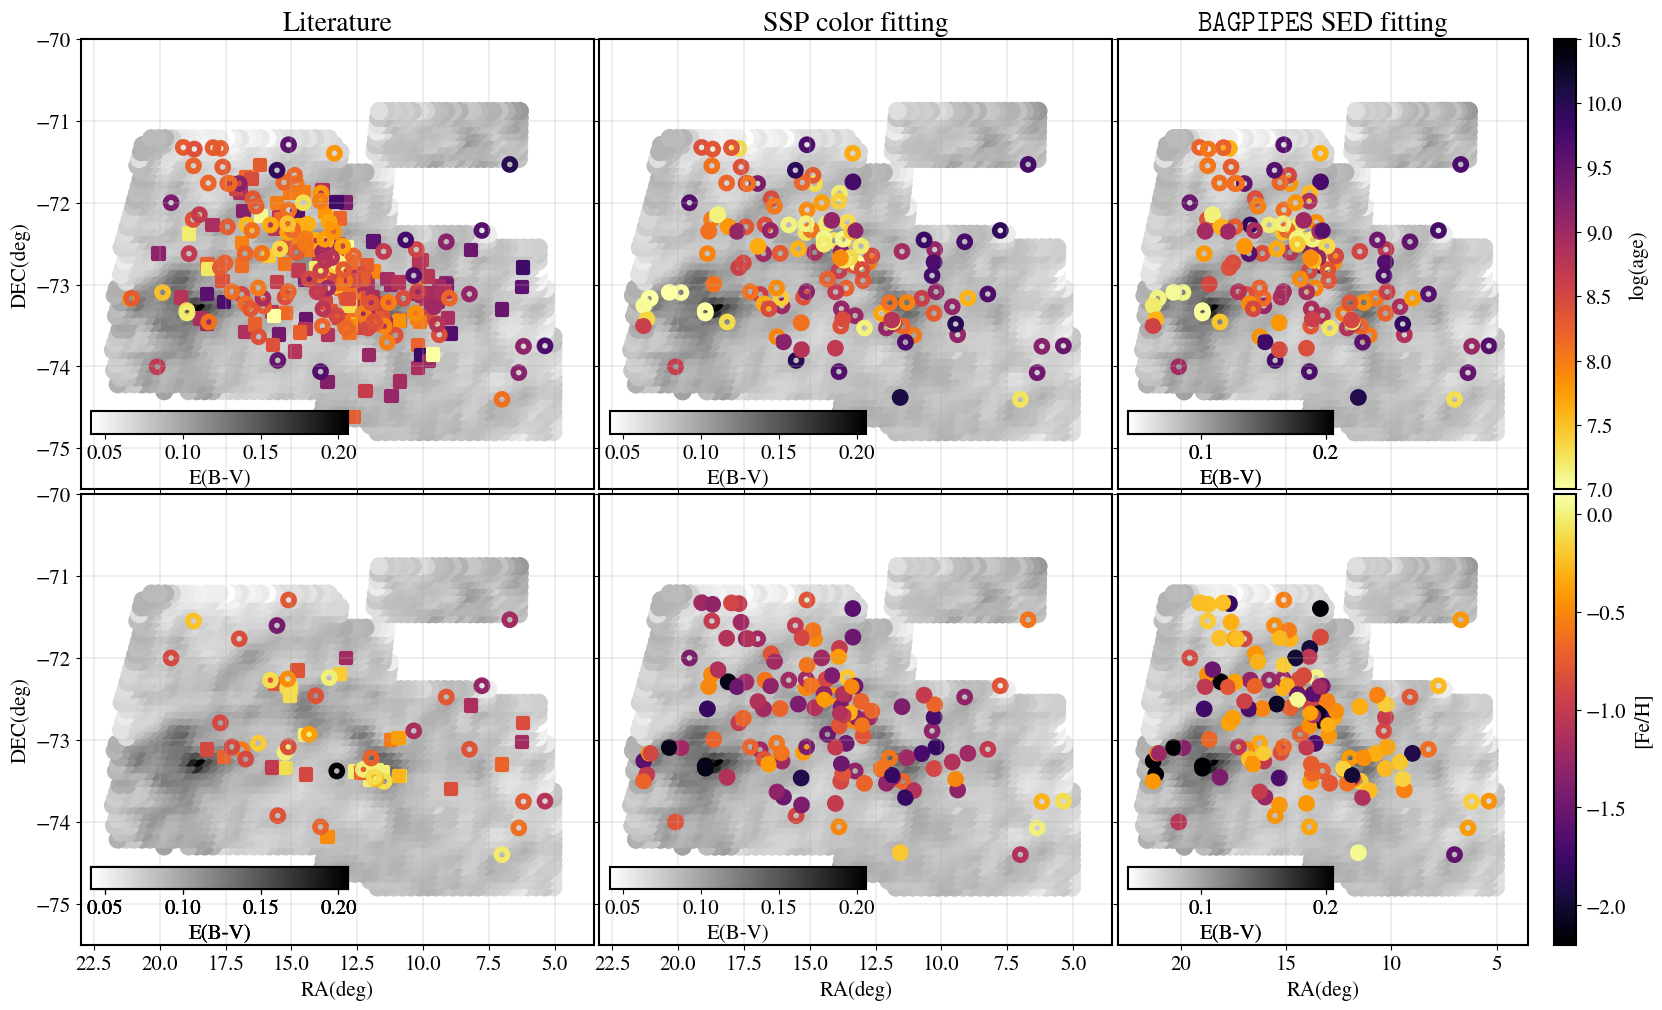

In [ ]:
reddening_map = np.loadtxt('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/StellarClusterFittingSPLUS/literature/smc_res5_radius7.txt')

c = reddening_map[:, 2]

fig = plt.figure(constrained_layout=False, figsize=(20, 12), dpi=100)

gs = fig.add_gridspec(nrows=2, ncols=3)
gs.update(wspace=0.01, hspace=0.01)

ax3 = fig.add_subplot(gs[0, 0])
ax4 = fig.add_subplot(gs[1, 0])

ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 1])

ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[1, 2])

ax3.set_title(r'Literature', fontsize=20)
ax5.set_title(r'SSP color fitting', fontsize=20)
ax1.set_title(r'$\tt {BAGPIPES}$ SED fitting', fontsize=20)

ax1.set_xlim(23, 3.5)
ax2.set_xlim(23, 3.5)
ax1.set_ylim(-75.5, -70)
ax2.set_ylim(-75.5, -70)



ax3.set_xlim(23, 3.5)
ax4.set_xlim(23, 3.5)
ax3.set_ylim(-75.5, -70)
ax4.set_ylim(-75.5, -70)

ax5.set_xlim(23, 3.5)
ax6.set_xlim(23, 3.5)
ax5.set_ylim(-75.5, -70)
ax6.set_ylim(-75.5, -70)




###########################################################################################
print(tbagpipes_flag0.colnames)
tn = tbagpipes_flag0[tbagpipes_flag0['logAge']==0]
a = ax1.scatter(tbagpipes_flag0['RA_1'], tbagpipes_flag0['DEC_1'],
                c=np.log10(tbagpipes_flag0['burst:age_50']*10**9), marker="o", 
                cmap='inferno_r', facecolors='none', s=65, linewidth=4, vmin=7, vmax=10.5)
a.set_facecolor('none')
cbar = plt.colorbar(a, ax=ax1, orientation='vertical', label='log(age)')
ax1.scatter(tn['RA_1'], tn['DEC_1'], c=np.log10(tn['burst:age_50']*10**9), 
            marker="o", cmap='inferno_r', s=100, vmin=7, vmax=10.5)
tn = tbagpipes_flag0[tbagpipes_flag0['FeH']==0]
a = ax2.scatter(tbagpipes_flag0['RA_1'], tbagpipes_flag0['DEC_1'], 
                c=np.log10(tbagpipes_flag0['burst:metallicity_50']*0.02/0.0152),
                marker="o", cmap='inferno', facecolors='none', s=65, linewidth=4, vmin=-2.2, vmax=0.1)
a.set_facecolor('none')
cbar = plt.colorbar(a, ax=ax2, orientation='vertical', label='[Fe/H]')
ax2.scatter(tn['RA_1'], tn['DEC_1'], 
            c=np.log10(tn['burst:metallicity_50']*0.02/0.0152), marker="o", 
            cmap='inferno', s=100, vmin=-2.2, vmax=0.1)

ax1.legend(loc='upper left', fontsize=15, bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.1)
ax2.legend(loc='upper left', fontsize=15, bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.1)
ax1.grid(b=True, lw=0.3)
ax2.grid(b=True, lw=0.3)

ax2.set_xlabel('RA(deg)')
ax1.set_ylabel('DEC(deg)')
ax2.set_ylabel('DEC(deg)')

r = plt.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', 
            marker='o', zorder=-1, s=25)
ax1.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax1,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax1.transAxes
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax2.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax2,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax2.transAxes
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')
###########################################################################################
tn = t_flag0[t_flag0['logAge']==0]
a = ax5.scatter(t_flag0['RA_1'], t_flag0['DEC_1'],
                c=t_flag0['50_logAge'], marker="o", 
                cmap='inferno_r', facecolors='none', s=65, linewidth=4, vmin=7, vmax=10.5)
a.set_facecolor('none')
#cbar = plt.colorbar(a, ax=ax5, orientation='vertical', label='log(age)')
ax5.scatter(tn['RA_1'], tn['DEC_1'], c=tn['50_logAge'], 
            marker="o", cmap='inferno_r', s=100, vmin=7, vmax=10.5)
tn = t_flag0[t_flag0['FeH']==0]
a = ax6.scatter(t_flag0['RA_1'], t_flag0['DEC_1'], 
                c=t_flag0['50_FeH'],
                marker="o", cmap='inferno', facecolors='none', s=65, linewidth=4, vmin=-2.2, vmax=0.1)
a.set_facecolor('none')
#cbar = plt.colorbar(a, ax=ax6, orientation='vertical', label='[Fe/H]')
ax6.scatter(tn['RA_1'], tn['DEC_1'], 
            c=tn['50_FeH'], marker="o", 
            cmap='inferno', s=100, vmin=-2.2, vmax=0.1)

ax5.legend(loc='upper left', fontsize=15, bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.1)
ax6.legend(loc='upper left', fontsize=15, bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.1)
ax5.grid(b=True, lw=0.3)
ax6.grid(b=True, lw=0.3)

ax6.set_xlabel('RA(deg)')
ax5.set_ylabel('DEC(deg)')
ax6.set_ylabel('DEC(deg)')

r = plt.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', 
            marker='o', zorder=-1, s=25)
ax5.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax5,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax5.transAxes
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax6.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax6,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax6.transAxes
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

###########################################################################################
a = ax3.scatter(tbagpipes_knownage_flagnot0['RA_1'], tbagpipes_knownage_flagnot0['DEC_1'],
                c=tbagpipes_knownage_flagnot0['logAge'], marker="s", cmap='inferno_r', 
                facecolors='none', s=55, linewidth=3, vmin=7, vmax=10.5)

a = ax3.scatter(tbagpipes_flag0knownage['RA_1'], tbagpipes_flag0knownage['DEC_1'],
                c=tbagpipes_flag0knownage['logAge'], marker="o", cmap='inferno_r', 
                facecolors='none', s=65, linewidth=4, vmin=7, vmax=10.5)
a.set_facecolor('none')
#cbar = plt.colorbar(a, ax=ax3, orientation='vertical', label='log(age)')

a = ax4.scatter(tbagpipes_knownfeh_flagnot0['RA_1'], tbagpipes_knownfeh_flagnot0['DEC_1'], 
                c=tbagpipes_knownfeh_flagnot0['FeH'],
                marker="s", cmap='inferno', facecolors='none', s=55, linewidth=3, vmin=-2.2, vmax=0.1)

a = ax4.scatter(tbagpipes_flag0knownfeh['RA_1'], tbagpipes_flag0knownfeh['DEC_1'], 
                c=tbagpipes_flag0knownfeh['FeH'],
                marker="o", cmap='inferno', facecolors='none', s=65, linewidth=4, vmin=-2.2, vmax=0.1)
a.set_facecolor('none')
#cbar = plt.colorbar(a, ax=ax4, orientation='vertical', label='[Fe/H]')


ax1.legend(loc='upper left', fontsize=15, bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.1)
ax2.legend(loc='upper left', fontsize=15, bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.1)
ax1.grid(b=True, lw=0.3)
ax2.grid(b=True, lw=0.3)
ax3.grid(b=True, lw=0.3)
ax4.grid(b=True, lw=0.3)

ax2.set_xlabel('RA(deg)')
ax1.set_ylabel('DEC(deg)')
ax2.set_ylabel('DEC(deg)')
ax4.set_xlabel('RA(deg)')
ax3.set_ylabel('DEC(deg)')
ax4.set_ylabel('DEC(deg)')

ax1.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax1,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax1.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax2.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax2,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax2.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax3.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax3,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax3.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax4.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax4,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax4.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax5.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax5,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax4.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax6.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax6,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax4.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax3.set(xlabel=None)
ax5.set(xlabel=None)
ax1.set(xlabel=None)

ax5.set(ylabel=None)
ax6.set(ylabel=None)
ax1.set(ylabel=None)
ax2.set(ylabel=None)


ax3.xaxis.set_ticklabels([])
ax5.xaxis.set_ticklabels([])
ax1.xaxis.set_ticklabels([])

ax5.yaxis.set_ticklabels([])
ax6.yaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])

plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/final_map_cutted.png', dpi=100)

# Gradients in spatial maps

In [ ]:
reddening_map = np.loadtxt('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/StellarClusterFittingSPLUS/literature/smc_res5_radius7.txt')

print('                   RA    DEC    N\n'
      'log(age)>9.0       {:.3f} {:.3f}  {} \n'  
      '8.0<log(age)<=9.0  {:.3f} {:.3f}  {} \n'
      'log(age)<=8.0      {:.3f} {:.3f}  {} \n'
      .format(np.std(t_flag0logage9_calc['RA_1']), np.std(t_flag0logage9_calc['DEC_1']), len(t_flag0logage9_calc),
              np.std(t_flag0logage8to9_calc['RA_1']), np.std(t_flag0logage8to9_calc['DEC_1']), len(t_flag0logage8to9_calc),
              np.std(t_flag0lesslogage8_calc['RA_1']), np.std(t_flag0lesslogage8_calc['DEC_1']), len(t_flag0lesslogage8_calc)))

print('                   RA    DEC    N\n'
      'log(age)>9.0       {:.3f} {:.3f}  {} \n'  
      '8.0<log(age)<=9.0  {:.3f} {:.3f}  {} \n'
      'log(age)<=8.0      {:.3f} {:.3f}  {} \n'
      .format(np.std(tbagpipes_flag0logage9_calc['RA_1']), np.std(tbagpipes_flag0logage9_calc['DEC_1']), len(tbagpipes_flag0logage9_calc),
              np.std(tbagpipes_flag0logage8to9_calc['RA_1']), np.std(tbagpipes_flag0logage8to9_calc['DEC_1']), len(tbagpipes_flag0logage8to9_calc),
              np.std(tbagpipes_flag0lesslogage8_calc['RA_1']), np.std(tbagpipes_flag0lesslogage8_calc['DEC_1']), len(tbagpipes_flag0lesslogage8_calc)))


t1 = t_flag0[t_flag0['50_FeH']>-0.4]
t11 = t_flag0[t_flag0['50_FeH']>-0.8]
t12 = t_flag0[t_flag0['50_FeH']>-1.2]
t2 = t11[t11['50_FeH']<=-0.4]
t3 = t12[t12['50_FeH']<=-0.8]
t4 = t_flag0[t_flag0['50_FeH']<=-1.2]

print('                   RA    DEC N\n'
      '[Fe/H]>-0.4       {:.3f} {:.3f}  {}\n'  
      '-0.8<[Fe/H]<=-0.4 {:.3f} {:.3f}  {}\n'
      '-1.2<[Fe/H]<=-0.8 {:.3f} {:.3f}  {}\n'
      '[Fe/H]<=1.2       {:.3f} {:.3f}  {}\n'  
      .format(np.std(t1['RA_1']), np.std(t1['DEC_1']), len(t1),
              np.std(t2['RA_1']), np.std(t2['DEC_1']), len(t2),
              np.std(t3['RA_1']), np.std(t3['DEC_1']), len(t3), 
              np.std(t4['RA_1']), np.std(t4['DEC_1']), len(t4)))


t1 = tbagpipes_flag0[np.log10(tbagpipes_flag0['burst:metallicity_50']*0.02/0.0152)>-0.4]
t11 = tbagpipes_flag0[np.log10(tbagpipes_flag0['burst:metallicity_50']*0.02/0.0152)>-0.8]
t12 = tbagpipes_flag0[np.log10(tbagpipes_flag0['burst:metallicity_50']*0.02/0.0152)>-1.2]
t2 = t11[np.log10(t11['burst:metallicity_50']*0.02/0.0152)<=-0.4]
t3 = t12[np.log10(t12['burst:metallicity_50']*0.02/0.0152)<=-0.8]
t4 = tbagpipes_flag0[np.log10(tbagpipes_flag0['burst:metallicity_50']*0.02/0.0152)<=-1.2]

print('                   RA    DEC N\n'
      '[Fe/H]>-0.4       {:.3f} {:.3f}  {}\n'  
      '-0.8<[Fe/H]<=-0.4 {:.3f} {:.3f}  {}\n'
      '-1.2<[Fe/H]<=-0.8 {:.3f} {:.3f}  {}\n'
      '[Fe/H]<=-1.2       {:.3f} {:.3f}  {}\n'  
      .format(np.std(t1['RA_1']), np.std(t1['DEC_1']), len(t1),
              np.std(t2['RA_1']), np.std(t2['DEC_1']), len(t2),
              np.std(t3['RA_1']), np.std(t3['DEC_1']), len(t3), 
              np.std(t4['RA_1']), np.std(t4['DEC_1']), len(t4)))


                   RA    DEC    N
log(age)>9.0       3.559 0.803  35 
8.0<log(age)<=9.0  2.648 0.719  50 
log(age)<=8.0      3.114 0.613  50 

                   RA    DEC    N
log(age)>9.0       3.727 0.844  29 
8.0<log(age)<=9.0  2.900 0.707  59 
log(age)<=8.0      3.146 0.618  47 

                   RA    DEC N
[Fe/H]>-0.4       3.523 0.763  6
-0.8<[Fe/H]<=-0.4 3.045 0.591  35
-1.2<[Fe/H]<=-0.8 3.464 0.817  38
[Fe/H]<=1.2       3.104 0.652  56

                   RA    DEC N
[Fe/H]>-0.4       3.281 0.774  40
-0.8<[Fe/H]<=-0.4 3.595 0.691  39
-1.2<[Fe/H]<=-0.8 2.702 0.629  20
[Fe/H]<=-1.2       3.347 0.652  36



# Literature comparison best sample

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


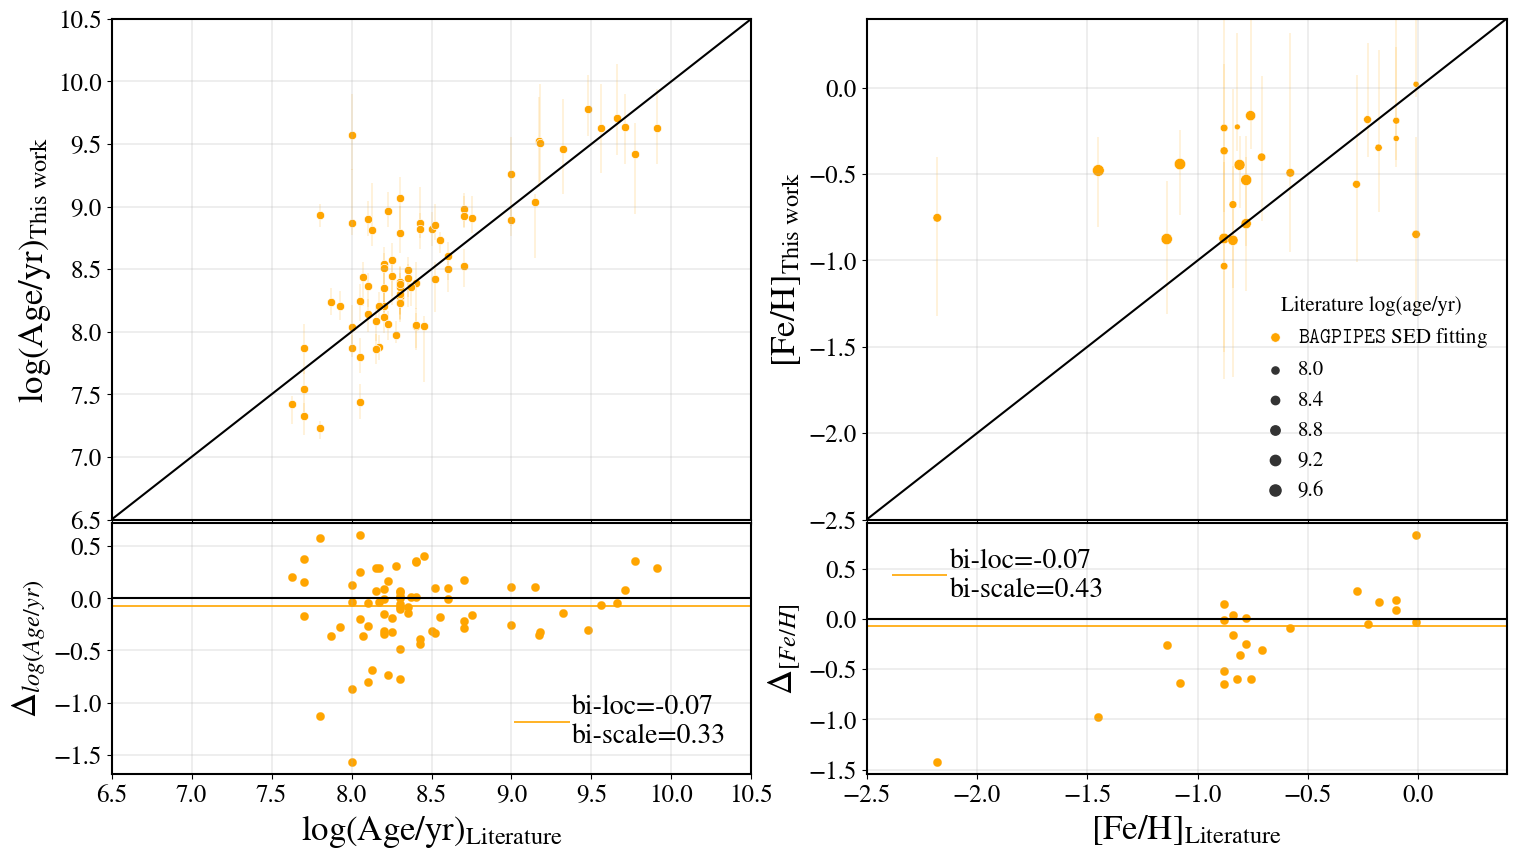

In [ ]:
fig = plt.figure(constrained_layout=False, figsize=(18, 10), dpi=100)
gs = fig.add_gridspec(nrows=2, ncols=2, wspace=0.18, hspace=0.01, height_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
x = 'logAge'
y = 'FeH'
xbagpipes = 'burst:age'
ybagpipes = 'burst:metallicity'
ax3.set_xlabel(r'log(Age/yr)$_{\rm Literature}$', fontsize=25)
ax1.set_ylabel(r'log(Age/yr)$_{\rm This \ work}$', fontsize=25)
ax3.set_ylabel(r'$\Delta_{log(Age/yr)}$', fontsize=25)
ax4.set_ylabel(r'$\Delta_{[Fe/H]}$', fontsize=25)
ax4.set_xlabel(r'[Fe/H]$_{\rm Literature}$', fontsize=25)
ax2.set_ylabel(r'[Fe/H]$_{\rm This \ work}$', fontsize=25)

ax1.set_xlim(6.5, 10.5)
ax3.set_xlim(6.5, 10.5)
ax1.set_ylim(6.5, 10.5)
ax1.grid(b=True, lw=0.3)
ax3.grid(b=True, lw=0.3)
ax1.plot([0, 1], [0, 1], transform=ax1.transAxes, color='black', lw=1.5)
ax3.hlines(y=0, xmin=6., xmax=11., color='black', lw=1.5)


t_flag0green = t_flag0[((t_flag0['rSDSS'] - t_flag0['zSDSS']) > -0.2) & ((t_flag0['rSDSS'] - t_flag0['zSDSS']) < 0.35) ]
tbagpipes_flag0green = tbagpipes_flag0[((tbagpipes_flag0['rSDSS'] - tbagpipes_flag0['zSDSS']) > -0.2) & ((tbagpipes_flag0['rSDSS'] - tbagpipes_flag0['zSDSS']) < 0.35)]

t_flag0greenknownage = t_flag0green[t_flag0green['logAge']!=0] 
t_flag0greenknownfeh = t_flag0green[t_flag0green['FeH']!=0]

tbagpipes_flag0greenknownage = tbagpipes_flag0green[tbagpipes_flag0green['logAge']!=0]
tbagpipes_flag0greenknownfeh = tbagpipes_flag0green[tbagpipes_flag0green['FeH']!=0]

# sns.scatterplot(t_flag0greenknownage[x], t_flag0greenknownage['50_' + x], label='',
#                 color='blue', ax=ax1)#, size=(t_flag0greenknownage[y]), )
# ax1.errorbar(x=t_flag0greenknownage[x], y=t_flag0greenknownage['50_' + x],
#              yerr=[(t_flag0greenknownage['84_' + x] - t_flag0greenknownage['50_' + x]),
#                   (t_flag0greenknownage['50_' + x] - t_flag0greenknownage['16_' + x])],
#              color='blue', zorder=-1, fmt='-', ls='none', lw=0.2)

sns.scatterplot(tbagpipes_flag0greenknownage[x], np.log10(tbagpipes_flag0greenknownage[xbagpipes + '_50'] * 10**9),
                label=r'', color='orange', ax=ax1)#, size=(tbagpipes_flag0greenknownage[y]))
ax1.errorbar(x=tbagpipes_flag0greenknownage[x], y=np.log10(tbagpipes_flag0greenknownage[xbagpipes + '_50'] * 10**9), 
             yerr=[(np.log10(tbagpipes_flag0greenknownage[xbagpipes + '_84'] * 10**9) - np.log10(tbagpipes_flag0greenknownage[xbagpipes + '_50'] * 10**9)),
                  (np.log10(tbagpipes_flag0greenknownage[xbagpipes + '_50'] * 10**9) - np.log10(tbagpipes_flag0greenknownage[xbagpipes + '_16'] * 10**9))],
              color='orange', zorder=-1, fmt='-', ls='none', lw=0.2)


# ax3.scatter(x=t_flag0greenknownage[x], y=t_flag0greenknownage[x] - t_flag0greenknownage['50_' + x], 
#               color='blue', zorder=-1, lw=0.2, marker='o')
ax3.scatter(x=tbagpipes_flag0greenknownage[x], y=tbagpipes_flag0greenknownage[x] - np.log10(tbagpipes_flag0greenknownage[xbagpipes + '_50'] * 10**9), 
              color='orange', zorder=-1, lw=0.2, marker='o')



ax2.set_xlim(-2.5, 0.4)
ax4.set_xlim(-2.5, 0.4)
ax2.set_ylim(-2.5, 0.4)
ax2.grid(b=True, lw=0.3)
ax4.grid(b=True, lw=0.3)
ax2.plot([0, 1], [0, 1], transform=ax2.transAxes, lw=1.5, c='black')
ax4.hlines(y=0, xmin=-3., xmax=1, color='black', lw=1.5)

# sns.scatterplot(t_flag0greenknownfeh[y], t_flag0greenknownfeh['50_' + y], label='SSP color fitting',
#                 size=(t_flag0greenknownfeh[x]), color='blue', ax=ax2)
# ax2.errorbar(x=t_flag0greenknownfeh[y], y=t_flag0greenknownfeh['50_' + y],
#              yerr=[(t_flag0greenknownfeh['84_' + y] - t_flag0greenknownfeh['50_' + y]),
#                    (t_flag0greenknownfeh['50_' + y] - t_flag0greenknownfeh['16_' + y])],
#              color='blue', zorder=-1, fmt='-', ls='none', lw=0.2)

sns.scatterplot(tbagpipes_flag0greenknownfeh[y], np.log10(tbagpipes_flag0greenknownfeh[ybagpipes + '_50'] * 0.02 / 0.0152),
                label=r'$\tt {BAGPIPES}$ SED fitting',
                size=(tbagpipes_flag0greenknownfeh[x]), color='orange', ax=ax2)
ax2.errorbar(x=tbagpipes_flag0greenknownfeh[y], y=np.log10(tbagpipes_flag0greenknownfeh[ybagpipes + '_50'] * 0.02 / 0.0152),
             yerr=[(np.log10(tbagpipes_flag0greenknownfeh[ybagpipes + '_84'] * 0.02 / 0.0152) - np.log10(
                   tbagpipes_flag0greenknownfeh[ybagpipes + '_50'] * 0.02 / 0.0152)),
                   (np.log10(tbagpipes_flag0greenknownfeh[ybagpipes + '_50'] * 0.02 / 0.0152) - np.log10(
                    tbagpipes_flag0greenknownfeh[ybagpipes + '_16'] * 0.02 / 0.0152))],
             color='orange', zorder=-1, fmt='-', ls='none', lw=0.2, label='')
# ax4.scatter(x=t_flag0greenknownfeh[y], y=t_flag0greenknownfeh[y] - t_flag0greenknownfeh['50_' + y], 
#               color='blue', zorder=-1, lw=0.2, marker='o')
ax4.scatter(x=tbagpipes_flag0greenknownfeh[y], y=tbagpipes_flag0greenknownfeh[y] - np.log10(tbagpipes_flag0greenknownfeh[ybagpipes + '_50'] * 0.02/0.0152), 
              color='orange', zorder=-1, lw=0.2, marker='o')


hand, labl = ax2.get_legend_handles_labels()

ax2.legend(title='Literature log(age/yr)', frameon=False, fontsize='15',
           title_fontsize='15', loc='best', handletextpad=0.1) #, bbox_to_anchor=(1, 1.05)


x_ssp = t_flag0greenknownage[x] - t_flag0greenknownage['50_' + x]
y_ssp = t_flag0greenknownfeh[y] - t_flag0greenknownfeh['50_' + y]
x_b = tbagpipes_flag0greenknownage[x] - np.log10(tbagpipes_flag0greenknownage[xbagpipes + '_50'] * 10**9)
y_b = tbagpipes_flag0greenknownfeh[y] - np.log10(tbagpipes_flag0greenknownfeh[ybagpipes + '_50'] * 0.02/0.0152)

# location = round(biweight_location(x_ssp), 2)
# scale = round(biweight_scale(x_ssp), 2)
# ax3.hlines(location, 6, 11, color='blue', label='bi-loc=' + str(location) + '\n' + 'bi-scale=' + str(scale), lw=1.2)
location = round(biweight_location(x_b), 2)
scale = round(biweight_scale(x_b), 2)
ax3.hlines(location, 6, 11, color='orange', label='bi-loc=' + str(location) + '\n' +'bi-scale=' + str(scale), lw=1.2)
ax3.legend(frameon=False, fontsize='20',
           loc='best', handletextpad=0.1)

# location = round(biweight_location(y_ssp), 2)
# scale = round(biweight_scale(y_ssp), 2)
# ax4.hlines(location, -3, 1, color='blue', label='bi-loc=' + str(location) + '\n' + 'bi-scale=' + str(scale), lw=1.2)
location = round(biweight_location(x_b), 2)
scale = round(biweight_scale(y_b), 2)
ax4.hlines(location, -3, 1, color='orange', label='bi-loc=' + str(location) + '\n' +'bi-scale=' + str(scale), lw=1.2)
ax4.legend(frameon=False, fontsize='20',
           loc='best', handletextpad=0.1)

ax1.set(xlabel=None)
ax2.set(xlabel=None)
ax1.xaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])

ax1.yaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)
ax3.xaxis.set_tick_params(labelsize=18)

ax2.yaxis.set_tick_params(labelsize=18)
ax4.yaxis.set_tick_params(labelsize=18)
ax4.xaxis.set_tick_params(labelsize=18)

plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/litcomparison_bestsample.png', dpi=100, bbox_inches='tight')

# KDE distributions for best sample



8.284977548581221 0.8973652995472876 -1.0154373049822865 0.44433558776233006
8.351806831806947 0.8666031170934414 -0.699742663665091 0.6281795410146878


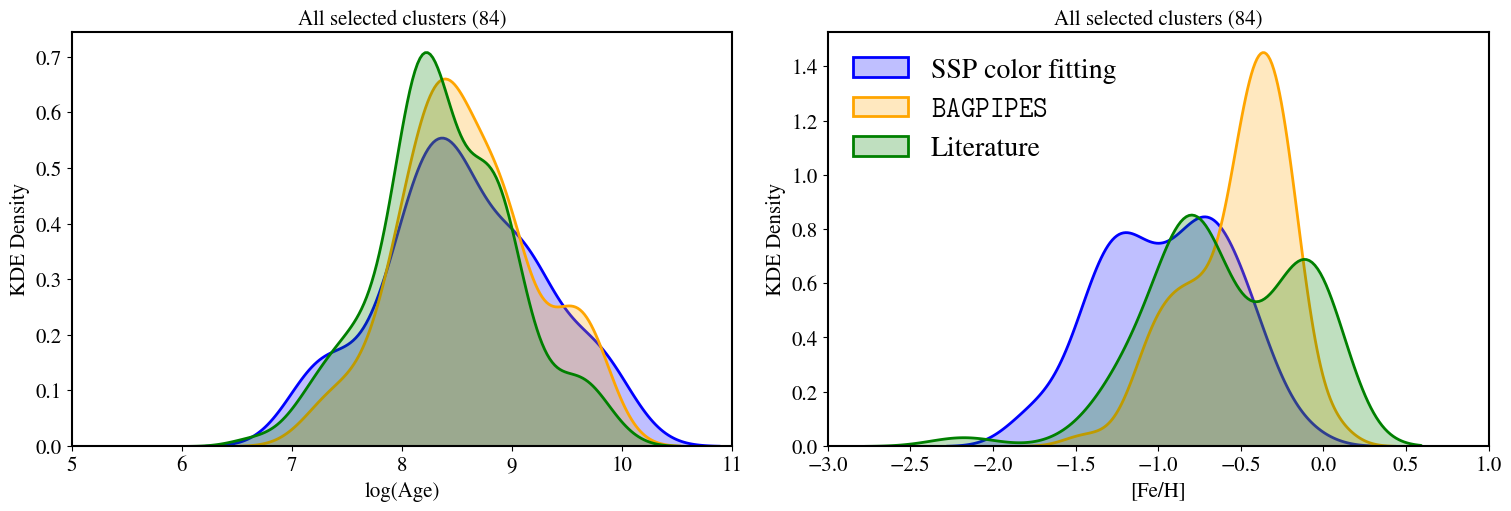

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(15, 5), dpi=100)
gs = fig.add_gridspec(nrows=1, ncols=2)
x = 'logAge'
y = 'FeH'
xbagpipes = 'burst:age'
ybagpipes = 'burst:metallicity'
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax1.set_xlabel('log(Age)', fontsize=15)
ax2.set_xlabel('[Fe/H]', fontsize=15)
ax1.set_ylabel('KDE Density', fontsize=15)
ax2.set_ylabel('KDE Density', fontsize=15)
ax1.set_xlim(5,11)
ax2.set_xlim(-3,1)

label_mycode='SSP color fitting'
label_bagpipes=r'$\tt{BAGPIPES}$'
label_literature='Literature'

t_flag0green = t_flag0[((t_flag0['rSDSS'] - t_flag0['zSDSS']) > -0.2) & ((t_flag0['rSDSS'] - t_flag0['zSDSS']) < 0.35) ]
tbagpipes_flag0green = tbagpipes_flag0[((tbagpipes_flag0['rSDSS'] - tbagpipes_flag0['zSDSS']) > -0.2) & ((tbagpipes_flag0['rSDSS'] - tbagpipes_flag0['zSDSS']) < 0.35)]


ax1.set_title('All selected clusters ('+str(len((tbagpipes_flag0green['object'])))+')', fontsize = 15)
ax2.set_title('All selected clusters ('+str(len((tbagpipes_flag0green['object'])))+')', fontsize = 15)
# ----------------------------------------------------------------------------------------------------
# ALL
sns.kdeplot(t_flag0green['50_' + x], ax=ax1, shade=True, lw=2, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0green[xbagpipes + '_50']*10**9), ax=ax1, shade=True, lw=2, color='orange')
sns.kdeplot(tbagpipes_knownage[x], ax=ax1, shade=True, lw=2, color='green')
sns.kdeplot(t_flag0green['50_' + y], ax=ax2, shade=True, lw=2, label=label_mycode, color='blue')
sns.kdeplot(np.log10(tbagpipes_flag0green[ybagpipes + '_50']*0.02/0.0152), ax=ax2, shade=True, lw=2, label=label_bagpipes, color='orange')
sns.kdeplot(tbagpipes_knownfeh[y], ax=ax2, shade=True, lw=2, label=label_literature, color='green')
#sns.kdeplot(APOGEE_SMC['[Fe/H]'], ax=ax2, shade=True, lw=2, label='APOGEE', color='yellow')

print(biweight_location(t_flag0['50_' + x]), biweight_scale(t_flag0['50_' + x]), biweight_location(t_flag0['50_' + y]), biweight_scale(t_flag0['50_' + y]))
print(biweight_location(np.log10(tbagpipes_flag0[xbagpipes + '_50']*10**9)), biweight_scale(np.log10(tbagpipes_flag0[xbagpipes + '_50']*10**9)),
      biweight_location(np.log10(tbagpipes_flag0[ybagpipes + '_50']*0.02/0.0152)), biweight_scale(np.log10(tbagpipes_flag0[ybagpipes + '_50']*0.02/0.0152)))

ax2.legend(bbox_to_anchor=(0., 1.0), loc="upper left", frameon=False, fontsize=20)
plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/kde_dists_best.pdf', dpi=100) 


# Distributions bimodalitiy





In [ ]:
from sklearn.mixture import GaussianMixture as GMM
import numpy as np
import matplotlib.pyplot as plt

t_flag0green = t_flag0[((t_flag0['rSDSS'] - t_flag0['zSDSS']) > -0.2) & ((t_flag0['rSDSS'] - t_flag0['zSDSS']) < 0.35) ]
tbagpipes_flag0green = tbagpipes_flag0[((tbagpipes_flag0['rSDSS'] - tbagpipes_flag0['zSDSS']) > -0.2) & ((tbagpipes_flag0['rSDSS'] - tbagpipes_flag0['zSDSS']) < 0.35)]
N=np.arange(1, 4)

def compute_GaussianMixture(X, N, covariance_type='full', max_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GMM(n_components=N[i], max_iter=max_iter,
                                    covariance_type=covariance_type)
        models[i].fit(X)
        print('N: ' + str(i+1) +' - means:'+ str(models[i].means_) + '/ std' + str(np.sqrt(models[i].covariances_)))
        print('Weights:', models[i].weights_)
    return models

def plot(X, N, param, name=''):
  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot(111)
  ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
  label = ['Literatura', 'Cores integradas', 'BAGPIPES']
  colors = ['green', 'blue', 'orange']
  for i in range(len(X)):
    print(label[i]+ '-' +param)
    X[i] = X[i].reshape(-1, 1)
    models = compute_GaussianMixture(X[i], N)
    AIC = [m.aic(X[i]) for m in models]
    BIC = [m.bic(X[i]) for m in models]
    
    i_best = np.argmin(BIC)
    print(BIC)
    gmm_best = models[i_best]
   
    print("best fit converged:", gmm_best.converged_)
    print("best fit converged:", gmm_best.converged_)
    print("BIC: n_components =  %i" % N[i_best])
    print('\n')
    
    if(label[i]=='Literatura' and param=='log(Age)'):
      print('lit')
      AIC=np.array(AIC)/3
      BIC=np.array(BIC)/3
      AIC=list(AIC)
      BIC=list(BIC)

    #ax.plot(N, AIC, '-o', label='AIC - '+ label[i], color=colors[i])
    ax.plot(N, BIC, ':o', label='BIC - '+ label[i], color=colors[i])
    
    ax.legend(loc='best', fontsize='small')
    ax.set_xlabel('Número de componentes')
    plt.setp(ax.get_yticklabels(), fontsize=20)
  plt.title('GMM para ' + param)
  plt.savefig('GMM_'+name+'.png', dpi=100)
agel = tbagpipes_knownage['logAge']
age = t_flag0green['50_logAge']
ageb = np.log10(tbagpipes_flag0green['burst:age_50']*10**9)
Zl = tbagpipes_knownfeh['FeH']
Z = t_flag0green['50_FeH']
Zb= np.log10(tbagpipes_flag0green['burst:metallicity_50']*0.02/0.0152)

ages = [agel, age, ageb]
plot(ages, N, 'log(Age)', 'logage')
Zs = [Zl, Z, Zb]
plot(Zs, N, '[Fe/H]', 'feh')


# Spatial maps best sample

['#ID', 'burst:age_16', 'burst:age_50', 'burst:age_84', 'burst:massformed_16', 'burst:massformed_50', 'burst:massformed_84', 'burst:metallicity_16', 'burst:metallicity_50', 'burst:metallicity_84', 'redshift_16', 'redshift_50', 'redshift_84', 'stellar_mass_16', 'stellar_mass_50', 'stellar_mass_84', 'formed_mass_16', 'formed_mass_50', 'formed_mass_84', 'sfr_16', 'sfr_50', 'sfr_84', 'ssfr_16', 'ssfr_50', 'ssfr_84', 'nsfr_16', 'nsfr_50', 'nsfr_84', 'mass_weighted_age_16', 'mass_weighted_age_50', 'mass_weighted_age_84', 'tform_16', 'tform_50', 'tform_84', 'tquench_16', 'tquench_50', 'tquench_84', 'UV_colour_16', 'UV_colour_50', 'UV_colour_84', 'VJ_colour_16', 'VJ_colour_50', 'VJ_colour_84', 'input_redshift', 'log_evidence', 'log_evidence_err', 'chisq_phot', 'n_bands', 'object', 'RA_1', 'DEC_1', 'logAge', 'age', 'FeH', 'Z', 'E(B-V)', 'field_1', 'CTYPE', 'a', 'b', 'flag_image', 'r_logAge', 'r__M_H_', 'flag_u', 'flag_r', 'field_2', 'RA_2', 'DEC_2', 'radius_aper(pixel)', 'uJava', 'F378', 'F395'

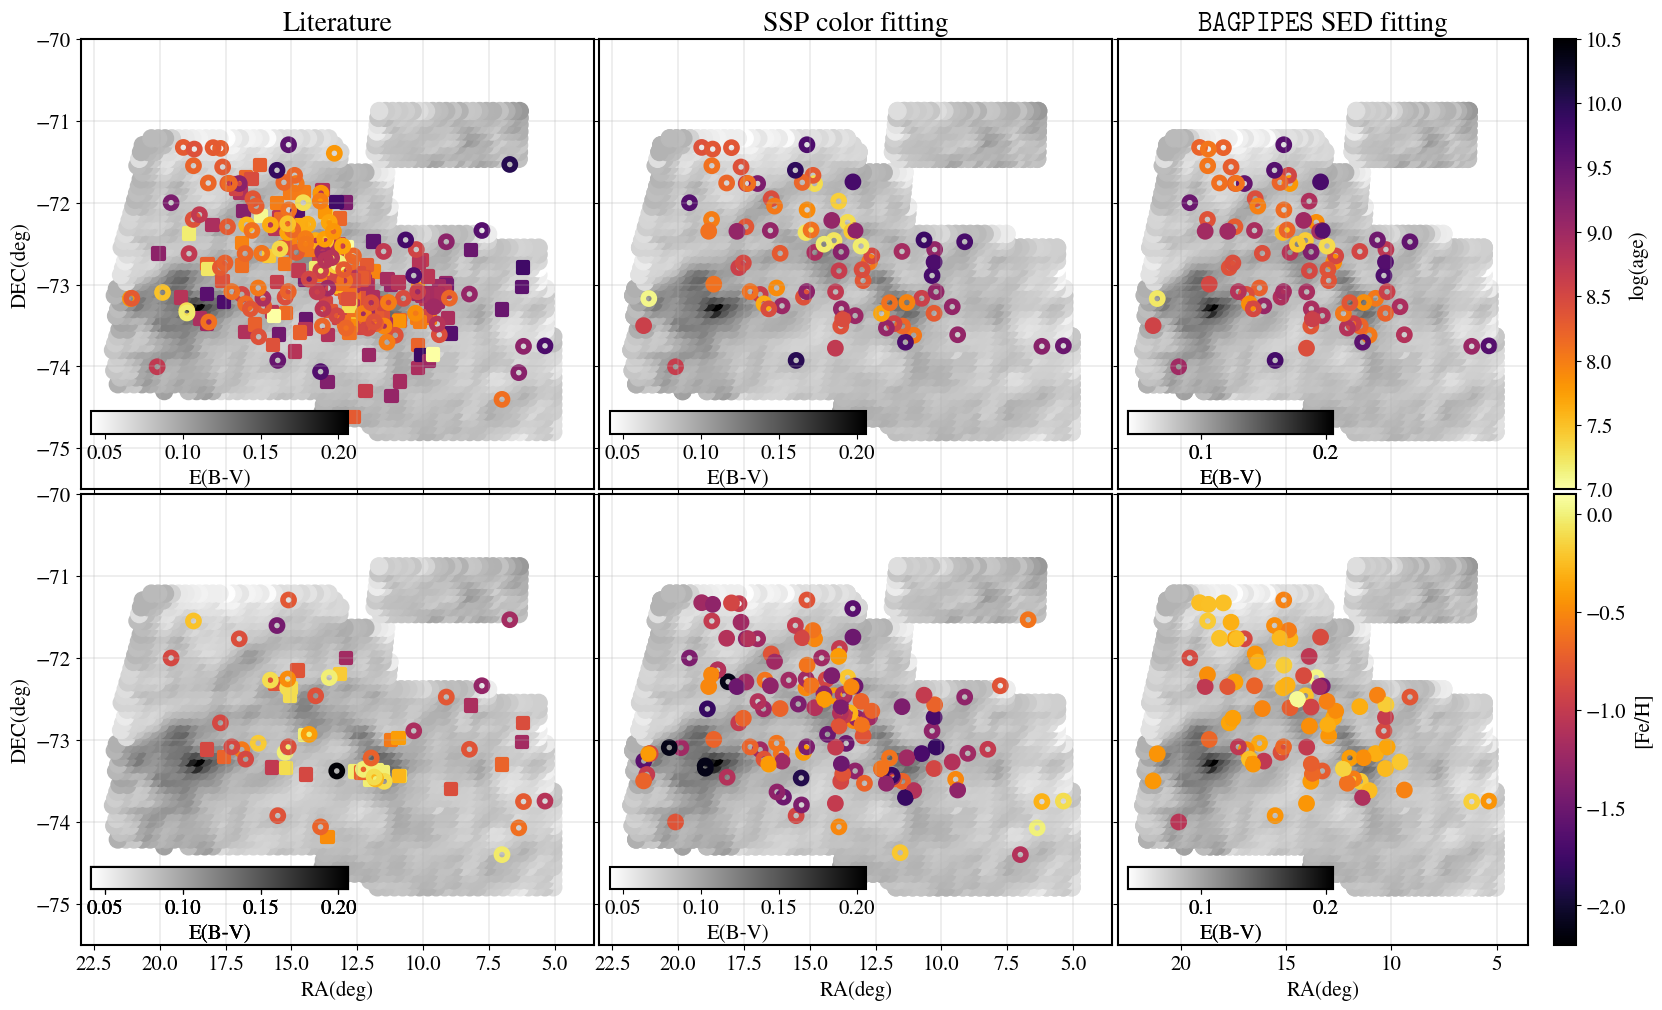

In [ ]:
reddening_map = np.loadtxt('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/StellarClusterFittingSPLUS/literature/smc_res5_radius7.txt')

c = reddening_map[:, 2]

fig = plt.figure(constrained_layout=False, figsize=(20, 12), dpi=100)

gs = fig.add_gridspec(nrows=2, ncols=3)
gs.update(wspace=0.01, hspace=0.01)

ax3 = fig.add_subplot(gs[0, 0])
ax4 = fig.add_subplot(gs[1, 0])

ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 1])

ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[1, 2])

ax3.set_title(r'Literature', fontsize=20)
ax5.set_title(r'SSP color fitting', fontsize=20)
ax1.set_title(r'$\tt {BAGPIPES}$ SED fitting', fontsize=20)

ax1.set_xlim(23, 3.5)
ax2.set_xlim(23, 3.5)
ax1.set_ylim(-75.5, -70)
ax2.set_ylim(-75.5, -70)

ax3.set_xlim(23, 3.5)
ax4.set_xlim(23, 3.5)
ax3.set_ylim(-75.5, -70)
ax4.set_ylim(-75.5, -70)

ax5.set_xlim(23, 3.5)
ax6.set_xlim(23, 3.5)
ax5.set_ylim(-75.5, -70)
ax6.set_ylim(-75.5, -70)


t_flag0green = t_flag0[((t_flag0['rSDSS'] - t_flag0['zSDSS']) > -0.2) & ((t_flag0['rSDSS'] - t_flag0['zSDSS']) < 0.35) ]
tbagpipes_flag0green = tbagpipes_flag0[((tbagpipes_flag0['rSDSS'] - tbagpipes_flag0['zSDSS']) > -0.2) & ((tbagpipes_flag0['rSDSS'] - tbagpipes_flag0['zSDSS']) < 0.35)]

###########################################################################################
print(tbagpipes_flag0green.colnames)
tn = tbagpipes_flag0green[tbagpipes_flag0green['logAge']==0]
a = ax1.scatter(tbagpipes_flag0green['RA_1'], tbagpipes_flag0green['DEC_1'],
                c=np.log10(tbagpipes_flag0green['burst:age_50']*10**9), marker="o", 
                cmap='inferno_r', facecolors='none', s=65, linewidth=4, vmin=7, vmax=10.5)
a.set_facecolor('none')
cbar = plt.colorbar(a, ax=ax1, orientation='vertical', label='log(age)')
ax1.scatter(tn['RA_1'], tn['DEC_1'], c=np.log10(tn['burst:age_50']*10**9), 
            marker="o", cmap='inferno_r', s=100, vmin=7, vmax=10.5)

tn = tbagpipes_flag0green[tbagpipes_flag0green['FeH']==0]
a = ax2.scatter(tbagpipes_flag0green['RA_1'], tbagpipes_flag0green['DEC_1'], 
                c=np.log10(tbagpipes_flag0green['burst:metallicity_50']*0.02/0.0152),
                marker="o", cmap='inferno', facecolors='none', s=65, linewidth=4, vmin=-2.2, vmax=0.1)
a.set_facecolor('none')
cbar = plt.colorbar(a, ax=ax2, orientation='vertical', label='[Fe/H]')
ax2.scatter(tn['RA_1'], tn['DEC_1'], 
            c=np.log10(tn['burst:metallicity_50']*0.02/0.0152), marker="o", 
            cmap='inferno', s=100, vmin=-2.2, vmax=0.1)

ax1.legend(loc='upper left', fontsize=15, bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.1)
ax2.legend(loc='upper left', fontsize=15, bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.1)
ax1.grid(b=True, lw=0.3)
ax2.grid(b=True, lw=0.3)

ax2.set_xlabel('RA(deg)')
ax1.set_ylabel('DEC(deg)')
ax2.set_ylabel('DEC(deg)')

r = plt.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', 
            marker='o', zorder=-1, s=25)
ax1.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax1,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax1.transAxes
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax2.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax2,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax2.transAxes
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')
###########################################################################################
tn = t_flag0green[t_flag0green['logAge']==0]
a = ax5.scatter(t_flag0green['RA_1'], t_flag0green['DEC_1'],
                c=t_flag0green['50_logAge'], marker="o", 
                cmap='inferno_r', facecolors='none', s=65, linewidth=4, vmin=7, vmax=10.5)
a.set_facecolor('none')
#cbar = plt.colorbar(a, ax=ax5, orientation='vertical', label='log(age)')
ax5.scatter(tn['RA_1'], tn['DEC_1'], c=tn['50_logAge'], 
            marker="o", cmap='inferno_r', s=100, vmin=7, vmax=10.5)
tn = t_flag0green[t_flag0green['FeH']==0]
a = ax6.scatter(t_flag0['RA_1'], t_flag0['DEC_1'], 
                c=t_flag0['50_FeH'],
                marker="o", cmap='inferno', facecolors='none', s=65, linewidth=4, vmin=-2.2, vmax=0.1)
a.set_facecolor('none')
#cbar = plt.colorbar(a, ax=ax6, orientation='vertical', label='[Fe/H]')
ax6.scatter(tn['RA_1'], tn['DEC_1'], 
            c=tn['50_FeH'], marker="o", 
            cmap='inferno', s=100, vmin=-2.2, vmax=0.1)

ax5.legend(loc='upper left', fontsize=15, bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.1)
ax6.legend(loc='upper left', fontsize=15, bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.1)
ax5.grid(b=True, lw=0.3)
ax6.grid(b=True, lw=0.3)

ax6.set_xlabel('RA(deg)')
ax5.set_ylabel('DEC(deg)')
ax6.set_ylabel('DEC(deg)')

r = plt.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', 
            marker='o', zorder=-1, s=25)
ax5.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax5,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax5.transAxes
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax6.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax6,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax6.transAxes
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

###########################################################################################
a = ax3.scatter(tbagpipes_knownage_flagnot0['RA_1'], tbagpipes_knownage_flagnot0['DEC_1'],
                c=tbagpipes_knownage_flagnot0['logAge'], marker="s", cmap='inferno_r', 
                facecolors='none', s=55, linewidth=3, vmin=7, vmax=10.5)

a = ax3.scatter(tbagpipes_flag0knownage['RA_1'], tbagpipes_flag0knownage['DEC_1'],
                c=tbagpipes_flag0knownage['logAge'], marker="o", cmap='inferno_r', 
                facecolors='none', s=65, linewidth=4, vmin=7, vmax=10.5)
a.set_facecolor('none')
#cbar = plt.colorbar(a, ax=ax3, orientation='vertical', label='log(age)')

a = ax4.scatter(tbagpipes_knownfeh_flagnot0['RA_1'], tbagpipes_knownfeh_flagnot0['DEC_1'], 
                c=tbagpipes_knownfeh_flagnot0['FeH'],
                marker="s", cmap='inferno', facecolors='none', s=55, linewidth=3, vmin=-2.2, vmax=0.1)

a = ax4.scatter(tbagpipes_flag0knownfeh['RA_1'], tbagpipes_flag0knownfeh['DEC_1'], 
                c=tbagpipes_flag0knownfeh['FeH'],
                marker="o", cmap='inferno', facecolors='none', s=65, linewidth=4, vmin=-2.2, vmax=0.1)
a.set_facecolor('none')
#cbar = plt.colorbar(a, ax=ax4, orientation='vertical', label='[Fe/H]')


ax1.legend(loc='upper left', fontsize=15, bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.1)
ax2.legend(loc='upper left', fontsize=15, bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.1)
ax1.grid(b=True, lw=0.3)
ax2.grid(b=True, lw=0.3)
ax3.grid(b=True, lw=0.3)
ax4.grid(b=True, lw=0.3)

ax2.set_xlabel('RA(deg)')
ax1.set_ylabel('DEC(deg)')
ax2.set_ylabel('DEC(deg)')
ax4.set_xlabel('RA(deg)')
ax3.set_ylabel('DEC(deg)')
ax4.set_ylabel('DEC(deg)')

ax1.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax1,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax1.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax2.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax2,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax2.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax3.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax3,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax3.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax4.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax4,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax4.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax5.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax5,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax4.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax6.scatter(reddening_map[:, 0], reddening_map[:, 1], c=c, cmap='binary', marker='o', zorder=-1, s=150)
axins = inset_axes(ax6,
                   width="50%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(0.0, 0.1, 1, 1),
                   bbox_transform=ax4.transAxes,
                   )
cbar = plt.colorbar(r, cax=axins,orientation='horizontal', label='E(B-V)')

ax3.set(xlabel=None)
ax5.set(xlabel=None)
ax1.set(xlabel=None)

ax5.set(ylabel=None)
ax6.set(ylabel=None)
ax1.set(ylabel=None)
ax2.set(ylabel=None)


ax3.xaxis.set_ticklabels([])
ax5.xaxis.set_ticklabels([])
ax1.xaxis.set_ticklabels([])

ax5.yaxis.set_ticklabels([])
ax6.yaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])


plt.savefig('/content/gdrive/MyDrive/USP/Artigos/BAGPIPES_SMC/final_map_cutted_bestsample.png', dpi=100)

# Gradients in spatial maps best sample



In [ ]:
reddening_map = np.loadtxt('/content/gdrive/MyDrive/USP/Mestrado/MSc_project/StellarClusterFittingSPLUS/literature/smc_res5_radius7.txt')

t_flag0green = t_flag0[((t_flag0['rSDSS'] - t_flag0['zSDSS']) > -0.2) & ((t_flag0['rSDSS'] - t_flag0['zSDSS']) < 0.35) ]
tbagpipes_flag0green = tbagpipes_flag0[((tbagpipes_flag0['rSDSS'] - tbagpipes_flag0['zSDSS']) > -0.2) & ((tbagpipes_flag0['rSDSS'] - tbagpipes_flag0['zSDSS']) < 0.35)]

t_flag0greenlogage9_calc = t_flag0green[t_flag0green['50_logAge'] > 9.]
t_flag0greenlogage8to9_calc = t_flag0green[(t_flag0green['50_logAge'] <= 9.) & (t_flag0green['50_logAge'] > 8.)]
t_flag0greenlesslogage8_calc = t_flag0green[t_flag0green['50_logAge'] <= 8.]

print('                   RA    DEC    N\n'
      'log(age)>9.0       {:.3f} {:.3f}  {} \n'  
      '8.0<log(age)<=9.0  {:.3f} {:.3f}  {} \n'
      'log(age)<=8.0      {:.3f} {:.3f}  {} \n'
      .format(np.std(t_flag0greenlogage9_calc['RA_1']), np.std(t_flag0greenlogage9_calc['DEC_1']), len(t_flag0greenlogage9_calc),
              np.std(t_flag0greenlogage8to9_calc['RA_1']), np.std(t_flag0greenlogage8to9_calc['DEC_1']), len(t_flag0greenlogage8to9_calc),
              np.std(t_flag0greenlesslogage8_calc['RA_1']), np.std(t_flag0greenlesslogage8_calc['DEC_1']), len(t_flag0greenlesslogage8_calc)))

tbagpipes_flag0greenlogage9_calc = tbagpipes_flag0green[np.log10(tbagpipes_flag0green['burst:age_50']* 10**9) > 9.]
tbagpipes_flag0greenlogage8to9_calc = tbagpipes_flag0green[(np.log10(tbagpipes_flag0green['burst:age_50']* 10**9) <= 9.) & (np.log10(tbagpipes_flag0green['burst:age_50']* 10**9) > 8.)]
tbagpipes_flag0greenlesslogage8_calc = tbagpipes_flag0green[np.log10(tbagpipes_flag0green['burst:age_50']* 10**9) <= 8.]

print('                   RA    DEC    N\n'
      'log(age)>9.0       {:.3f} {:.3f}  {} \n'  
      '8.0<log(age)<=9.0  {:.3f} {:.3f}  {} \n'
      'log(age)<=8.0      {:.3f} {:.3f}  {} \n'
      .format(np.std(tbagpipes_flag0greenlogage9_calc['RA_1']), np.std(tbagpipes_flag0greenlogage9_calc['DEC_1']), len(tbagpipes_flag0greenlogage9_calc),
              np.std(tbagpipes_flag0greenlogage8to9_calc['RA_1']), np.std(tbagpipes_flag0greenlogage8to9_calc['DEC_1']), len(tbagpipes_flag0greenlogage8to9_calc),
              np.std(tbagpipes_flag0greenlesslogage8_calc['RA_1']), np.std(tbagpipes_flag0greenlesslogage8_calc['DEC_1']), len(tbagpipes_flag0greenlesslogage8_calc)))


t1 = t_flag0green[t_flag0green['50_FeH']>-0.4]
t11 = t_flag0green[t_flag0green['50_FeH']>-0.8]
t12 = t_flag0green[t_flag0green['50_FeH']>-1.2]
t2 = t11[t11['50_FeH']<=-0.4]
t3 = t12[t12['50_FeH']<=-0.8]
t4 = t_flag0green[t_flag0green['50_FeH']<=-1.2]

print('                   RA    DEC N\n'
      '[Fe/H]>-0.4       {:.3f} {:.3f}  {}\n'  
      '-0.8<[Fe/H]<=-0.4 {:.3f} {:.3f}  {}\n'
      '-1.2<[Fe/H]<=-0.8 {:.3f} {:.3f}  {}\n'
      '[Fe/H]<=1.2       {:.3f} {:.3f}  {}\n'  
      .format(np.std(t1['RA_1']), np.std(t1['DEC_1']), len(t1),
              np.std(t2['RA_1']), np.std(t2['DEC_1']), len(t2),
              np.std(t3['RA_1']), np.std(t3['DEC_1']), len(t3), 
              np.std(t4['RA_1']), np.std(t4['DEC_1']), len(t4)))


t1 = tbagpipes_flag0green[np.log10(tbagpipes_flag0green['burst:metallicity_50']*0.02/0.0152)>-0.4]
t11 = tbagpipes_flag0green[np.log10(tbagpipes_flag0green['burst:metallicity_50']*0.02/0.0152)>-0.8]
t12 = tbagpipes_flag0green[np.log10(tbagpipes_flag0green['burst:metallicity_50']*0.02/0.0152)>-1.2]
t2 = t11[np.log10(t11['burst:metallicity_50']*0.02/0.0152)<=-0.4]
t3 = t12[np.log10(t12['burst:metallicity_50']*0.02/0.0152)<=-0.8]
t4 = tbagpipes_flag0green[np.log10(tbagpipes_flag0green['burst:metallicity_50']*0.02/0.0152)<=-1.2]

print('                   RA    DEC N\n'
      '[Fe/H]>-0.4       {:.3f} {:.3f}  {}\n'  
      '-0.8<[Fe/H]<=-0.4 {:.3f} {:.3f}  {}\n'
      '-1.2<[Fe/H]<=-0.8 {:.3f} {:.3f}  {}\n'
      '[Fe/H]<=-1.2       {:.3f} {:.3f}  {}\n'  
      .format(np.std(t1['RA_1']), np.std(t1['DEC_1']), len(t1),
              np.std(t2['RA_1']), np.std(t2['DEC_1']), len(t2),
              np.std(t3['RA_1']), np.std(t3['DEC_1']), len(t3), 
              np.std(t4['RA_1']), np.std(t4['DEC_1']), len(t4)))


                   RA    DEC    N
log(age)>9.0       3.388 0.721  27 
8.0<log(age)<=9.0  2.785 0.741  42 
log(age)<=8.0      2.418 0.492  15 

                   RA    DEC    N
log(age)>9.0       3.672 0.800  17 
8.0<log(age)<=9.0  2.944 0.704  56 
log(age)<=8.0      2.482 0.461  11 

                   RA    DEC N
[Fe/H]>-0.4       3.687 0.712  3
-0.8<[Fe/H]<=-0.4 2.773 0.516  28
-1.2<[Fe/H]<=-0.8 2.746 0.867  23
[Fe/H]<=1.2       3.096 0.676  30

                   RA    DEC N
[Fe/H]>-0.4       3.220 0.705  34
-0.8<[Fe/H]<=-0.4 3.273 0.656  33
-1.2<[Fe/H]<=-0.8 2.941 0.653  16
[Fe/H]<=-1.2       0.000 0.000  1



In [ ]:
t_flag0knownfeh['FeH'] = 10**t_flag0knownfeh['FeH']
print(t_flag0knownfeh['object', 'FeH'])